# Google Clout Platform Query
SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 21989

# 1. Perkenalan 
- Nama  : Andreean Dharma Arisandi
- Batch : FTDS-011

# 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay, precision_score, plot_roc_curve
from feature_engine.outliers import OutlierTrimmer, Winsorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV

Import Libraries yang digunakan pada pengerjaan milestone 1 ini

# 3. Data Loading

In [2]:
data = pd.read_csv('h8dsft_P1M1_Andreean-Dharma-Arisandi.csv')
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


Load data csv yang hasil download dari Google Cloud Platform dan menampilkan 5 teratas data

In [3]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Menampilkan 5 terbawah dari dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Data berjumlah 2965 baris dan 24 kolom dan dilihat seperti tidak ada missing value, jadi untuk limit batch dikali dengan tahun lahir tidak bisa sampai jadi 21989 karena jumlah data keseluruhan di google cloud platform dari awal memang berjumlah 2965

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


Menampilkan describe dataset, menampilkan min, Q1, Q2(Median), Q3 dan max

In [6]:
data.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

dataset tidak memiliki missing value

In [7]:
num_column = list(data.select_dtypes("number").columns)
data[num_column].describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


Kolom Numerik

In [8]:
cat_column = list(data.select_dtypes(object))
data[cat_column]

""
0
1
2
3
4
...
2960
2961
2962
2963


Tidak ada kolom kategorikal, tapi ada kolom kategorikal berbentuk numerik seperti sex, education_level, marital_status, pay_0 sampai dengan pay_6 yang nantinya akan di pisahkan dari kolom numerik agar tidak ikut di scaling karena datanya kategorikal

# 4. Exploratory Data Analysis (EDA)

In [9]:
plt.style.use('fivethirtyeight')

Style untuk EDA

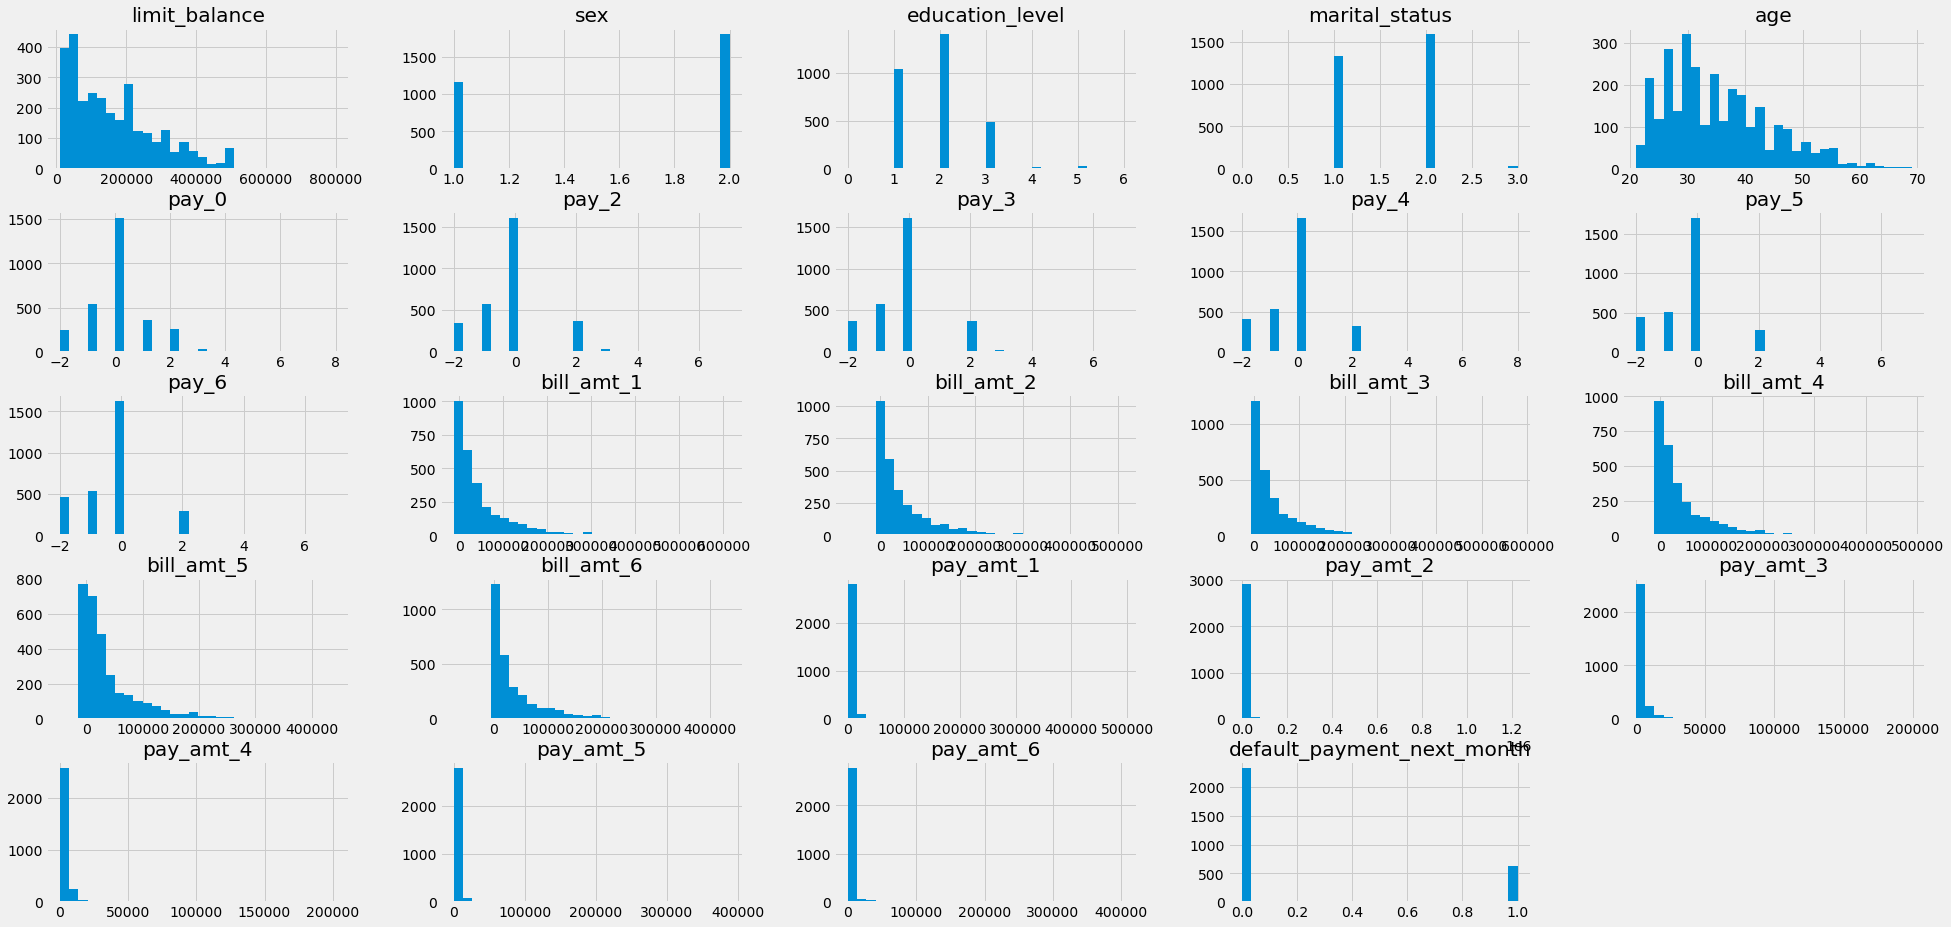

In [10]:
data.hist(bins=30, figsize=(30,15))

plt.show()

Berdasarkan histogram diatas bisa dilihat bahwa mayoritas datanya berdistribusi skew

Text(0.5, 1.0, 'Histogram Limit Saldo')

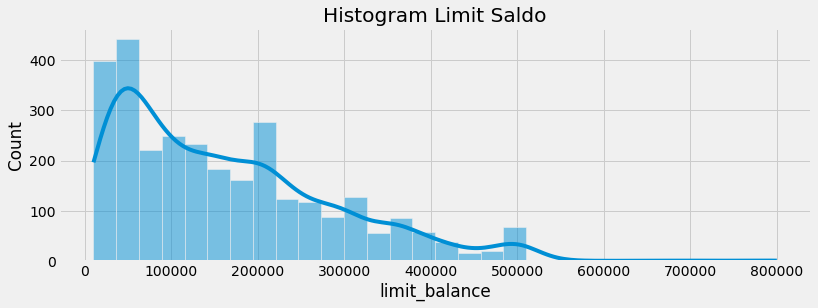

In [11]:
plt.figure(figsize=(12, 4))
sns.histplot(data['limit_balance'], bins=30, kde=True)
plt.title('Histogram Limit Saldo')

Data limit saldo terbanyak dari 10.000 sampai 100.000

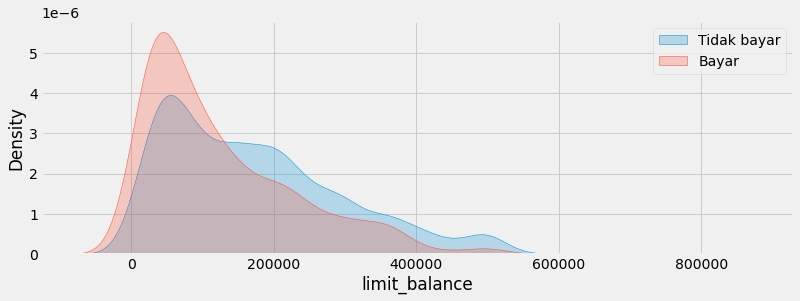

In [12]:
plt.figure(figsize=(12,4))

sns.kdeplot(data.loc[(data['default_payment_next_month'] == 0), 'limit_balance'], label = 'Tidak bayar', shade = True)
sns.kdeplot(data.loc[(data['default_payment_next_month'] == 1), 'limit_balance'], label = 'Bayar', shade = True)
plt.legend()
plt.show()

Untuk limit balance pada range 10000 sampai 150000 lebih banyak nasabah yang bayar sedangkan 150000 keatas lebih banyak yang tidak bayar, maka bisa dikatakan untuk limit yang besar mayoritas tidak bayar

In [13]:
data['sex'].value_counts()

2    1802
1    1163
Name: sex, dtype: int64

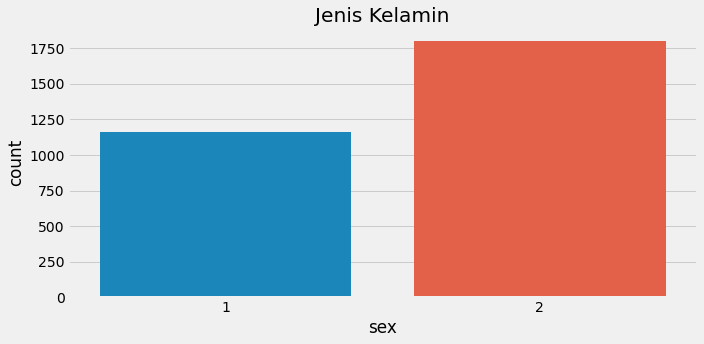

In [14]:
plt.figure(figsize = (10,5))
sns.countplot(x = data['sex'])
plt.title("Jenis Kelamin")
plt.tight_layout()
plt.show()

Jenis Kelamin
- 1 = Male
- 2 = Female

Pada dataset ini jumlah nasabah lebih banyak perempuan dengan jumlah 1802 dibandingkan laki-laki yang hanya 1163 bisa dimaklumi karena wanita lebih banyak berbelanja dibandingkan dengan pria

In [15]:
sex = data[data['default_payment_next_month']==0]['sex'].value_counts()
sex

2    1429
1     901
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex'>

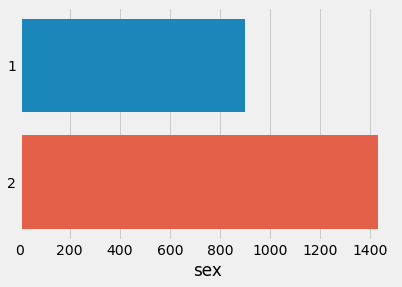

In [16]:
sns.barplot(x=sex, y=sex.index,orient='h')

Klien yang tidak akan membayar default pembayaranya di dominasi wanita dengan 61% sedangkan pria 39%, tapi memang jumlah datanya lebih banyak wanita

In [17]:
sex1 = data[data['default_payment_next_month']==1]['sex'].value_counts()
sex1

2    373
1    262
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex'>

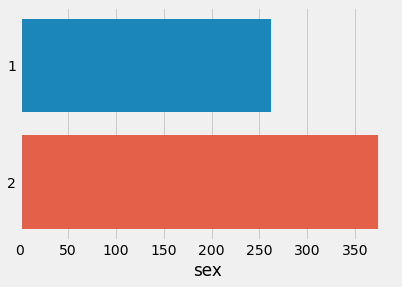

In [18]:
sns.barplot(x=sex1, y=sex1.index,orient='h')

Untuk klien yang akan membayar juga di dominasi wanita tetapi jaraknya tidak terlalu jauh dibandingkan dengan yang tidak akan membayar, untuk wanita 58% sedangkan pria 42%

In [19]:
data['education_level'].value_counts()

2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

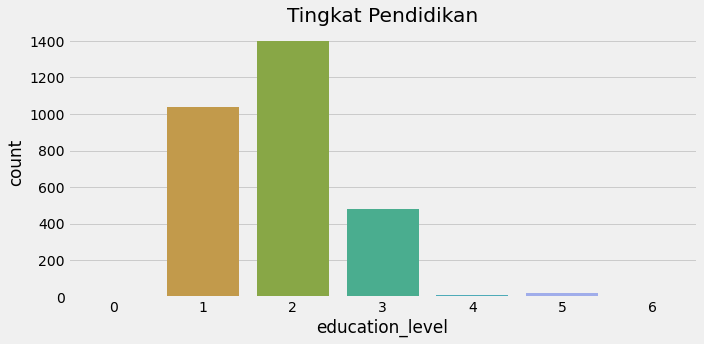

In [20]:
plt.figure(figsize = (10,5))
sns.countplot(x = data['education_level'])
plt.title("Tingkat Pendidikan")
plt.tight_layout()
plt.show()

Education Level 
- 1=graduate school 
- 2=university
- 3=high school
- 4=others 
- 5=unknown
- 6=unknown

Pada dataset ini tingkat pendidikan terbanyak yaitu sarjana dengan jumlah 1400 kedua disusul oleh magister 1039

In [21]:
no_edu = data[data['default_payment_next_month']==0]['education_level'].value_counts()
no_edu

2    1058
1     862
3     370
5      23
4      13
0       2
6       2
Name: education_level, dtype: int64

<AxesSubplot:xlabel='education_level'>

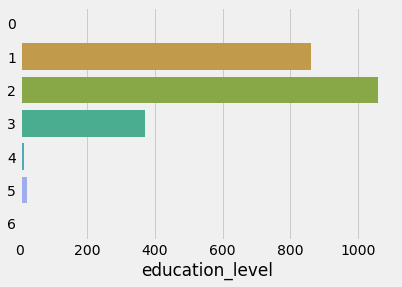

In [22]:
sns.barplot(x=no_edu, y=no_edu.index,orient='h')

Klien yang tidak akan membayar perbandinganya sama saja seperti jumlah datanya di urutan pertama adalah sarjana dan kedua magister

In [23]:
yes_edu = data[data['default_payment_next_month']==1]['education_level'].value_counts()
yes_edu

2    342
1    177
3    113
6      2
5      1
Name: education_level, dtype: int64

<AxesSubplot:xlabel='education_level'>

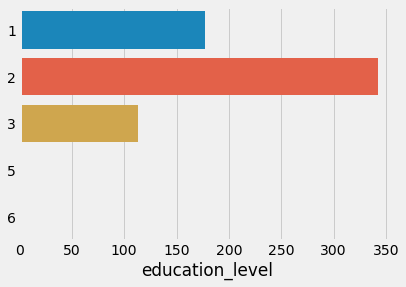

In [24]:
sns.barplot(x=yes_edu, y=yes_edu.index,orient='h')

Untuk klien yang akan membayar pada bulan depan juga sama saja perbandinganya sarjana di urutan pertama dan magister kedua

In [25]:
data['marital_status'].value_counts()

2    1594
1    1332
3      35
0       4
Name: marital_status, dtype: int64

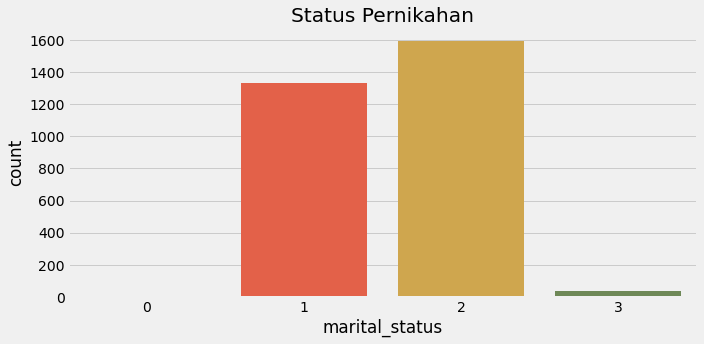

In [26]:
plt.figure(figsize = (10,5))
sns.countplot(x = data['marital_status'])
plt.title("Status Pernikahan")
plt.tight_layout()
plt.show()

Marital status 
- 1=married
- 2=single
- 3=others

Status pernikahan tertinggi yaitu single dengan jumlah 1594, di urutan kedua married dengan jumlah 1332

In [27]:
no_mrtl = data[data['default_payment_next_month']==0]['marital_status'].value_counts()
no_mrtl

2    1267
1    1030
3      29
0       4
Name: marital_status, dtype: int64

<AxesSubplot:xlabel='marital_status'>

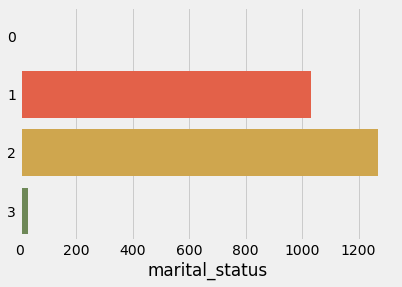

In [28]:
sns.barplot(x=no_mrtl, y=no_mrtl.index,orient='h')

Status pernikahan yang tidak akan membayar sama seperti datanya yaitu nomor 1 single dengan jumlah 1267 dan married diurutan kedua dengan jumlah 1030

In [29]:
yes_mrtl = data[data['default_payment_next_month']==1]['marital_status'].value_counts()
yes_mrtl

2    327
1    302
3      6
Name: marital_status, dtype: int64

<AxesSubplot:xlabel='marital_status'>

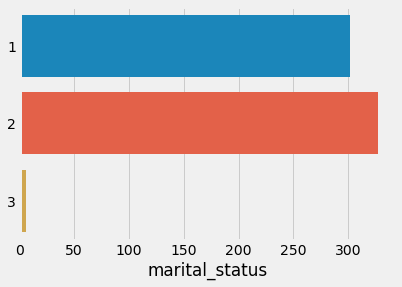

In [30]:
sns.barplot(x=yes_mrtl, y=yes_mrtl.index,orient='h')

Untuk yang akan membayar urutanya sama saja tetapi perbandinganya cukup sedikit untuk single dan maried, maka bisa di katakan status pernikahan cukup berpengaruh terhatap pembayaran credit default bulan depan

Text(0.5, 1.0, 'Histogram Umur')

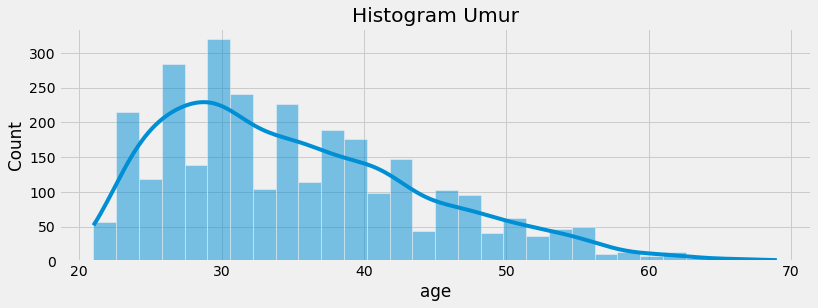

In [31]:
plt.figure(figsize=(12, 4))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Histogram Umur')

Data umur dari 21 sampai denga 69

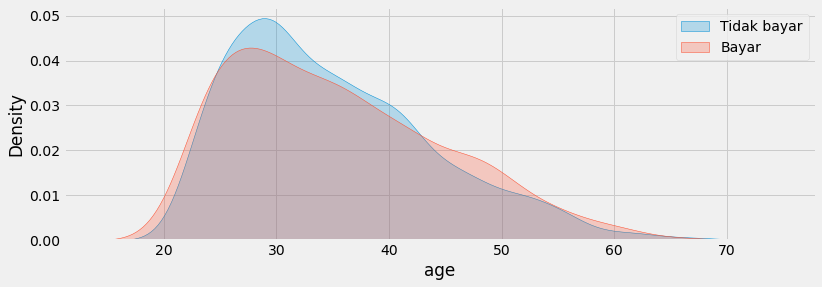

In [32]:
plt.figure(figsize=(12,4))

sns.kdeplot(data.loc[(data['default_payment_next_month'] == 0), 'age'], label = 'Tidak bayar', shade = True)
sns.kdeplot(data.loc[(data['default_payment_next_month'] == 1), 'age'], label = 'Bayar', shade = True)
plt.legend()
plt.show()

Pada range umur 25 sampai dengan 40 lebih banyak yang tidak bayar dibandingkan yang bayar

<AxesSubplot:>

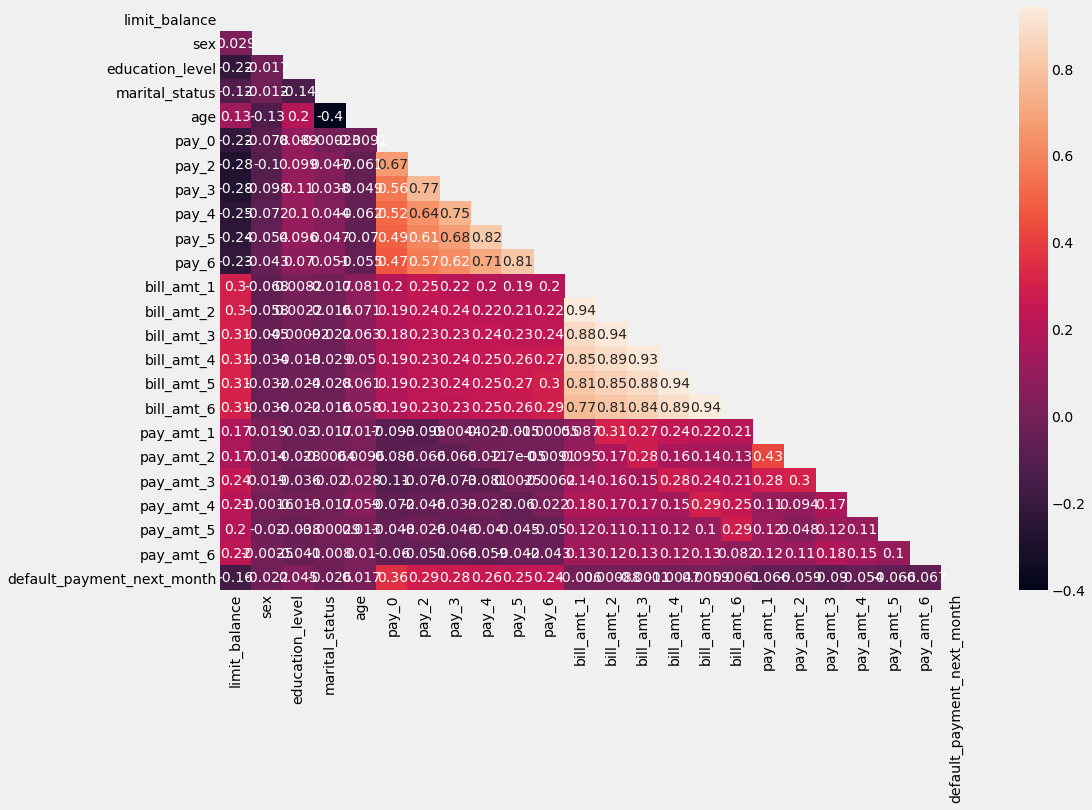

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True, mask=np.triu(data.corr()))

Tidak bisa membaca Hitmap Correlation dikarenakan terlalu banyak fitur numerik

In [34]:
data.corr(method='pearson')

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
limit_balance,1.000000,0.028560,-0.220874,-0.117909,0.130805,-0.223497,-0.281057,-0.275726,-0.245538,-0.236102,...,0.308918,0.309346,0.306496,0.171902,0.169361,0.242904,0.210302,0.200632,0.224960,-0.161909
sex,0.028560,1.000000,-0.016816,-0.011742,-0.127359,-0.078188,-0.104959,-0.098495,-0.072319,-0.053660,...,-0.033684,-0.032004,-0.035632,0.019311,0.014299,0.019432,-0.001635,-0.019963,-0.002479,-0.021765
education_level,-0.220874,-0.016816,1.000000,-0.135548,0.197189,0.089191,0.099282,0.105426,0.101337,0.096330,...,-0.017839,-0.024139,-0.021942,-0.030440,-0.027683,-0.035931,-0.013496,-0.037795,-0.040558,0.044926
marital_status,-0.117909,-0.011742,-0.135548,1.000000,-0.400617,-0.000231,0.047172,0.037733,0.043507,0.047366,...,-0.028957,-0.028412,-0.015740,-0.017355,-0.006396,-0.019958,-0.017476,-0.000289,-0.008024,-0.025998
age,0.130805,-0.127359,0.197189,-0.400617,1.000000,-0.009070,-0.061002,-0.048808,-0.061540,-0.069756,...,0.050337,0.061422,0.057900,0.016988,0.009628,0.027720,0.058554,0.013403,0.010300,0.016905
pay_0,-0.223497,-0.078188,0.089191,-0.000231,-0.009070,1.000000,0.668640,0.560446,0.519716,0.493273,...,0.187317,0.185056,0.185651,-0.093121,-0.085982,-0.105665,-0.071562,-0.048355,-0.059863,0.356963
pay_2,-0.281057,-0.104959,0.099282,0.047172,-0.061002,0.668640,1.000000,0.765616,0.643265,0.605527,...,0.232091,0.228745,0.229091,-0.098743,-0.066226,-0.075787,-0.046495,-0.026198,-0.050794,0.288813
pay_3,-0.275726,-0.098495,0.105426,0.037733,-0.048808,0.560446,0.765616,1.000000,0.750440,0.676661,...,0.236443,0.236052,0.228902,-0.004377,-0.066426,-0.073095,-0.033320,-0.046254,-0.066192,0.275758
pay_4,-0.245538,-0.072319,0.101337,0.043507,-0.061540,0.519716,0.643265,0.750440,1.000000,0.823226,...,0.249524,0.252534,0.249842,-0.020703,-0.011330,-0.080911,-0.027776,-0.039732,-0.059409,0.255805
pay_5,-0.236102,-0.053660,0.096330,0.047366,-0.069756,0.493273,0.605527,0.676661,0.823226,1.000000,...,0.263476,0.267059,0.257019,-0.014592,-0.000027,0.002544,-0.060026,-0.045322,-0.042375,0.253319


Berdasarkan hasil korelasi semua fitur berdiri sendiri atau dependent karena saling memiliki nilai korelasi yang kecil

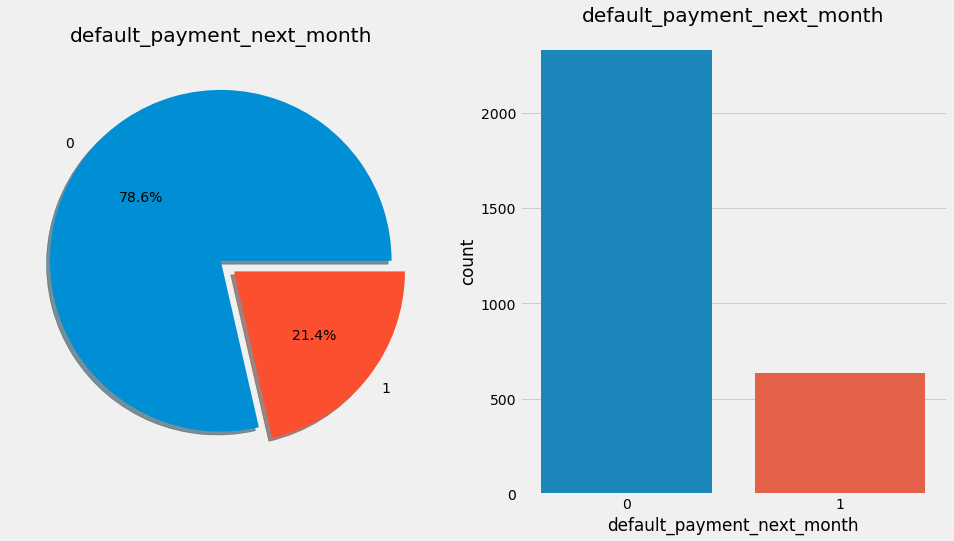

In [35]:
f,ax=plt.subplots(1,2,figsize=(15,8))
data['default_payment_next_month'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('default_payment_next_month')
ax[0].set_ylabel('')
sns.countplot('default_payment_next_month',data=data,ax=ax[1])
ax[1].set_title('default_payment_next_month')
plt.show()

Data target disini imbalanced dengan perbandingan 78.6% tidak bayar dibandingkan yang bayar 21.4%

# 5. Preprocessing

In [36]:
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


## Merubah data kategorikal nominal berbentuk numerik

In [37]:
data['education_level'].unique()

array([1, 2, 3, 5, 4, 6, 0], dtype=int64)

In [38]:
data['education_level'].mode()

0    2
dtype: int64

In [39]:
data.replace({'education_level':{0 :2}}, inplace=True)

dikarenakan ada 0 yang seharusnya tidak ada, maka akan di ganti dengan modus data menjadi 2 atau sarjana

In [40]:
data['education_level'].unique()

array([1, 2, 3, 5, 4, 6], dtype=int64)

sudah sesuai dengan datasetnya yaitu 1-6

In [41]:
data['marital_status'].unique()

array([2, 1, 3, 0], dtype=int64)

In [42]:
data['marital_status'].mode()

0    2
dtype: int64

In [43]:
data.replace({'marital_status':{0 :2}}, inplace=True)

dikarenakan ada 0 yang seharusnya tidak ada di marital status, maka akan di ganti dengan modus data menjadi 2 atau single

In [44]:
data['marital_status'].unique()

array([2, 1, 3], dtype=int64)

Sudah sesuai datanya menjadi 1 sampai 3

In [45]:
data['sex'] = data['sex'].map({1:'male',
                               2: 'female'})
data['marital_status'] = data['marital_status'].map({1:'married',
                                                     2:'single',
                                                     3:'others'})

Merubah data kategorikal nominal berbentuk numerik menjadi data kategorikal agar bisa diencoding. Untuk data kategorikal nominal berbentuk numerik tidak dirubah menjadi kategorikal tapi akan didrop saja pada saat proses scaling tidak diikutkan pada proses scaling

In [46]:
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,male,1,single,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,female,1,single,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,male,1,single,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,male,1,married,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,male,1,single,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


Pada data terbaru sex dan marital status sudah berubah menjadi kategorikal

In [47]:
data_inf = data.sample(10, random_state=9)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2434,200000.0,male,2,married,39.0,-1.0,-1.0,2.0,-1.0,0,...,617.0,620.0,0.0,1879.0,8.0,617.0,3.0,0.0,0.0,0
2925,180000.0,female,2,single,29.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
180,210000.0,male,5,married,31.0,2.0,0.0,0.0,0.0,0,...,126946.0,93925.0,-285.0,9234.0,5185.0,4900.0,4526.0,21787.0,152951.0,0
1879,30000.0,female,1,single,27.0,1.0,2.0,0.0,0.0,2,...,30444.0,29887.0,29153.0,0.0,2000.0,3000.0,0.0,1000.0,1000.0,0
2738,350000.0,female,1,married,55.0,-1.0,-1.0,-1.0,-1.0,-1,...,7461.0,4124.0,1261.0,1935.0,1630.0,7461.0,4124.0,1261.0,2798.0,0
2570,220000.0,male,2,married,40.0,-1.0,-1.0,-1.0,-1.0,-1,...,4887.0,3083.0,9401.0,1000.0,11289.0,4887.0,3083.0,10020.0,6473.0,0
422,50000.0,female,1,single,25.0,0.0,0.0,0.0,0.0,0,...,38008.0,31898.0,20154.0,2000.0,5040.0,8034.0,3029.0,5000.0,49436.0,0
358,20000.0,male,2,married,25.0,0.0,0.0,0.0,0.0,0,...,17322.0,17119.0,17350.0,1552.0,2659.0,1419.0,606.0,500.0,1000.0,0
1979,170000.0,male,1,single,32.0,2.0,2.0,-2.0,-2.0,-2,...,0.0,0.0,6271.0,0.0,0.0,0.0,0.0,6271.0,0.0,1
2474,50000.0,male,2,single,23.0,-1.0,-1.0,-1.0,-1.0,0,...,1695.0,12645.0,12584.0,350.0,400.0,1695.0,11300.0,485.0,2400.0,0


Mengambil 10 sample data inference dari data train dan dataset menjadi 2955

In [48]:
data_train = data.drop(data_inf.index)
data_train

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,male,1,single,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,female,1,single,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,male,1,single,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,male,1,married,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,male,1,single,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,female,2,married,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,female,1,married,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,male,1,single,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,male,2,married,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


Drop data inferenced dari dataset

In [49]:
data_train.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,200000.0,male,2,married,39.0,-1.0,-1.0,2.0,-1.0,0,...,617.0,620.0,0.0,1879.0,8.0,617.0,3.0,0.0,0.0,0
1,180000.0,female,2,single,29.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,210000.0,male,5,married,31.0,2.0,0.0,0.0,0.0,0,...,126946.0,93925.0,-285.0,9234.0,5185.0,4900.0,4526.0,21787.0,152951.0,0
3,30000.0,female,1,single,27.0,1.0,2.0,0.0,0.0,2,...,30444.0,29887.0,29153.0,0.0,2000.0,3000.0,0.0,1000.0,1000.0,0
4,350000.0,female,1,married,55.0,-1.0,-1.0,-1.0,-1.0,-1,...,7461.0,4124.0,1261.0,1935.0,1630.0,7461.0,4124.0,1261.0,2798.0,0
5,220000.0,male,2,married,40.0,-1.0,-1.0,-1.0,-1.0,-1,...,4887.0,3083.0,9401.0,1000.0,11289.0,4887.0,3083.0,10020.0,6473.0,0
6,50000.0,female,1,single,25.0,0.0,0.0,0.0,0.0,0,...,38008.0,31898.0,20154.0,2000.0,5040.0,8034.0,3029.0,5000.0,49436.0,0
7,20000.0,male,2,married,25.0,0.0,0.0,0.0,0.0,0,...,17322.0,17119.0,17350.0,1552.0,2659.0,1419.0,606.0,500.0,1000.0,0
8,170000.0,male,1,single,32.0,2.0,2.0,-2.0,-2.0,-2,...,0.0,0.0,6271.0,0.0,0.0,0.0,0.0,6271.0,0.0,1
9,50000.0,male,2,single,23.0,-1.0,-1.0,-1.0,-1.0,0,...,1695.0,12645.0,12584.0,350.0,400.0,1695.0,11300.0,485.0,2400.0,0


Reset index dataset dan data inferenced

## Spliting Data

In [50]:
X = data_train.drop('default_payment_next_month', axis=1) 
y= data_train['default_payment_next_month']
X

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000.0,male,1,single,39.0,0.0,0.0,0.0,0.0,0,...,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,110000.0,female,1,single,29.0,0.0,0.0,0.0,0.0,0,...,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,270000.0,male,1,single,36.0,0.0,0.0,0.0,2.0,0,...,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,130000.0,male,1,married,45.0,0.0,0.0,0.0,0.0,0,...,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,50000.0,male,1,single,24.0,0.0,0.0,0.0,0.0,0,...,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,210000.0,female,2,married,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0
2951,280000.0,female,1,married,41.0,2.0,-1.0,-1.0,-1.0,-2,...,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0
2952,80000.0,male,1,single,28.0,1.0,-1.0,-1.0,-1.0,-2,...,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0
2953,200000.0,male,2,married,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0


Split data menjadi X dan y

In [51]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2950    0
2951    0
2952    0
2953    1
2954    0
Name: default_payment_next_month, Length: 2955, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=9)

print('X_Train Size :', X_train.shape)
print('X_Test Size :', X_test.shape)
print('y_Train Size :', y_train.shape)
print('y_Test Size :', y_test.shape)

X_Train Size : (2364, 23)
X_Test Size : (591, 23)
y_Train Size : (2364,)
y_Test Size : (591,)


Split Dataset menggunakan perbandingan 80:20

## Handling Outlier

In [53]:
def diagnostic_plots(X_train, column):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[column],bins=30, palette='deep')
    plt.title(f'Distribution of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(X_train[column])
    plt.title(f'Boxplot of {column}')

    skewness = X_train[column].skew(axis = 0, skipna = True)
    print (f'Skewness of {column} =', skewness)

In [54]:
num_columns = X_train.select_dtypes (include=np.number).columns.tolist()

Membuat fungsi visualisasi distribusi data, boxplot dan cek skew data

Skewness of limit_balance = 1.0101744594537863
Skewness of education_level = 0.891279822375957
Skewness of age = 0.7826572631760894
Skewness of pay_0 = 1.0364600905121382
Skewness of pay_2 = 0.8904288919584661
Skewness of pay_3 = 0.9850969061423807
Skewness of pay_4 = 1.1115590435694434
Skewness of pay_5 = 1.0928614786121715
Skewness of pay_6 = 1.0458927547299615
Skewness of bill_amt_1 = 2.4894471113322725
Skewness of bill_amt_2 = 2.4194882354054776
Skewness of bill_amt_3 = 2.5073646217612557
Skewness of bill_amt_4 = 2.3048030419544756
Skewness of bill_amt_5 = 2.280085368667044
Skewness of bill_amt_6 = 2.3060660315634833
Skewness of pay_amt_1 = 11.90331720871857
Skewness of pay_amt_2 = 32.43405082620054
Skewness of pay_amt_3 = 7.4947484816089815
Skewness of pay_amt_4 = 8.24337131414228
Skewness of pay_amt_5 = 11.749484830603857
Skewness of pay_amt_6 = 9.933950318784134


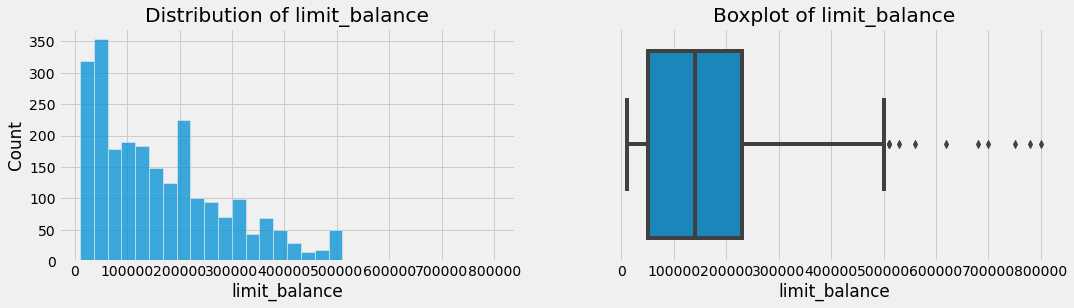

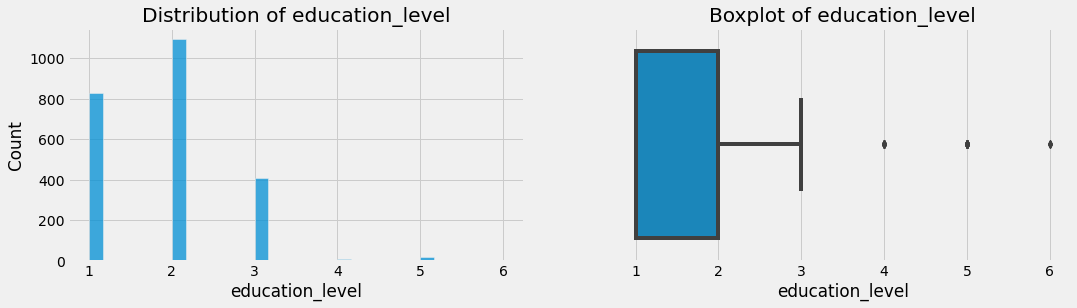

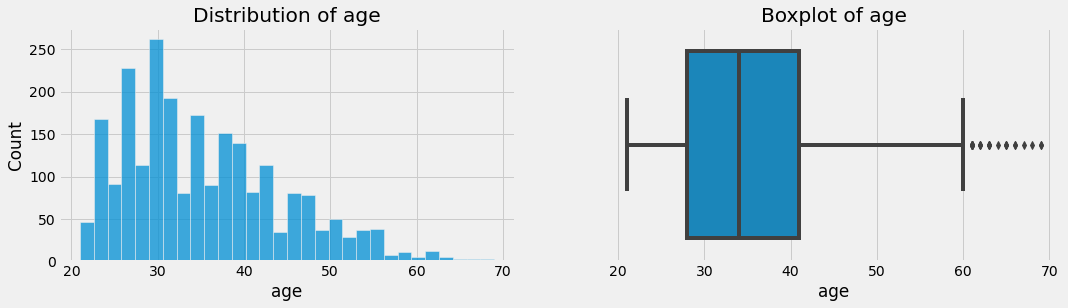

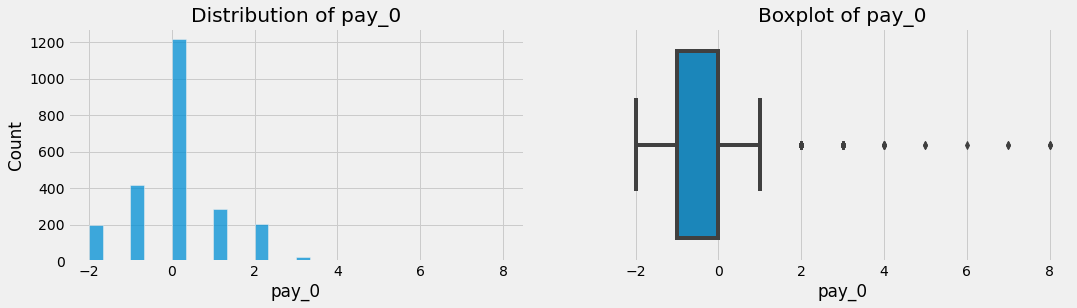

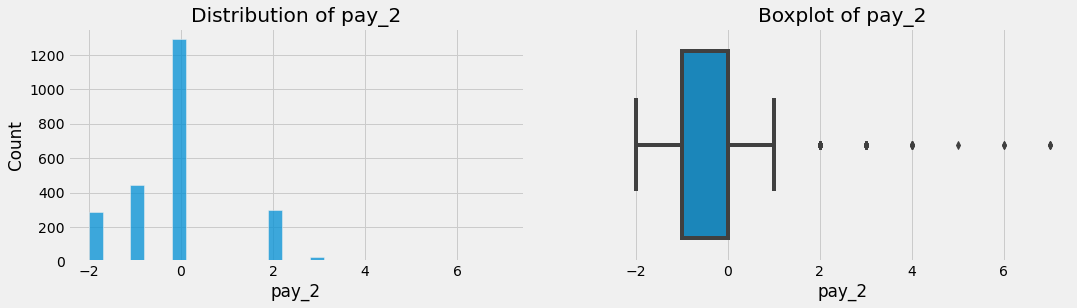

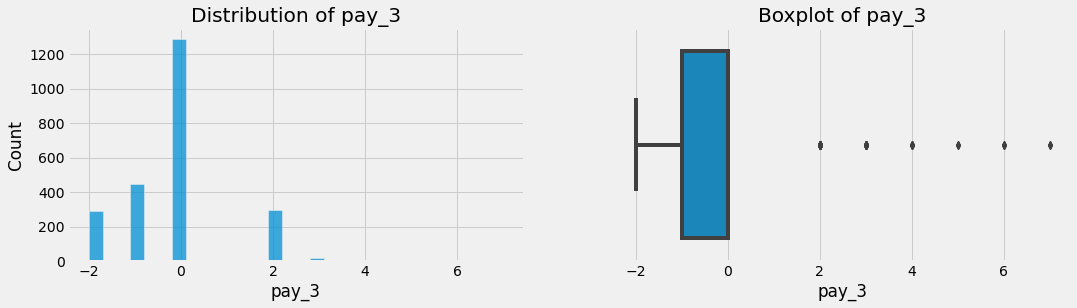

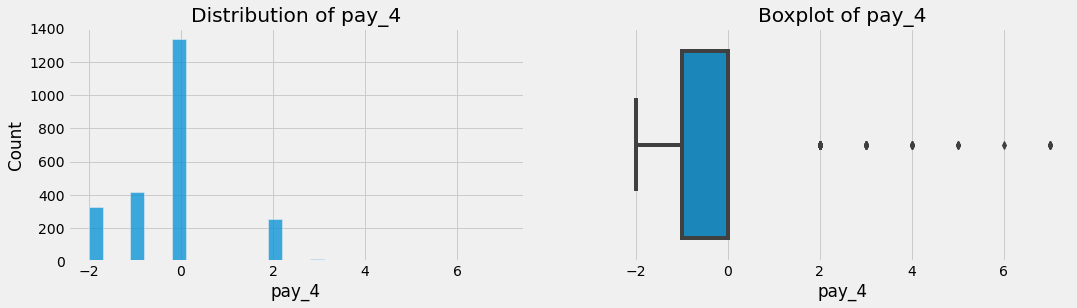

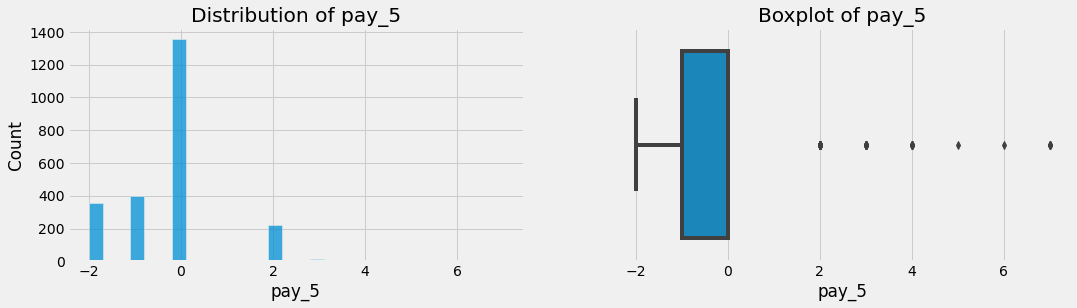

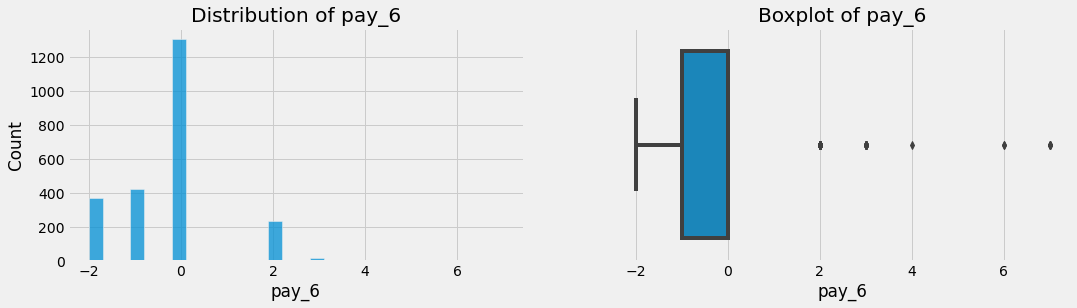

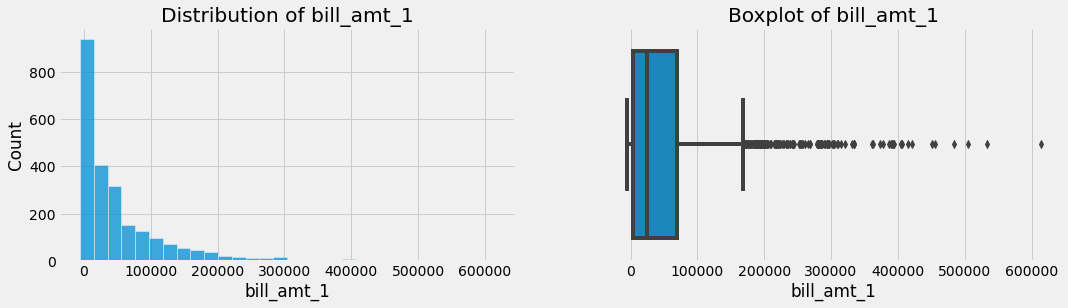

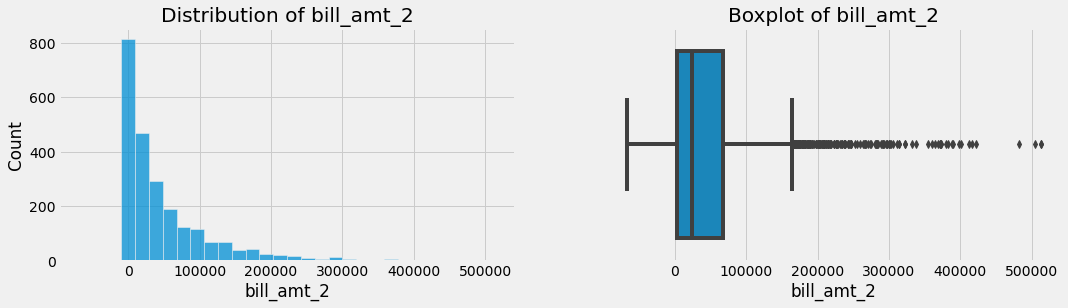

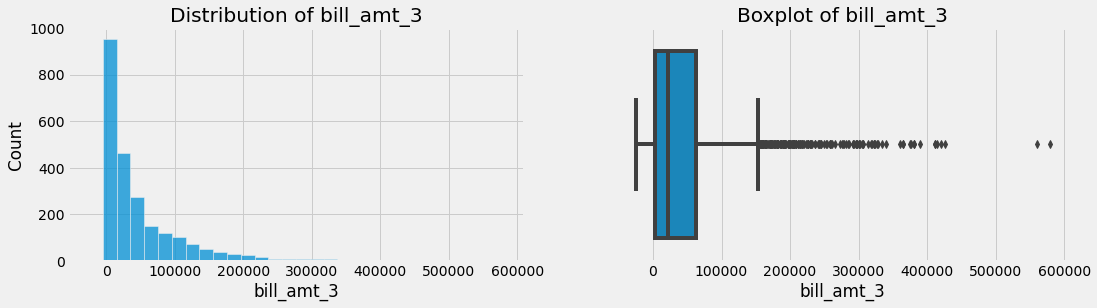

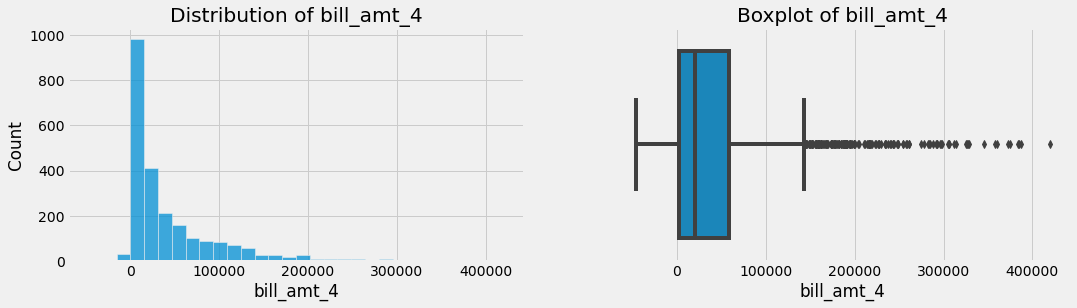

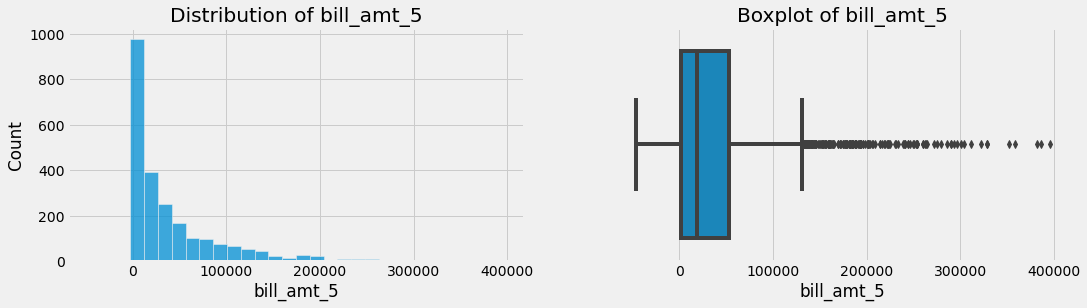

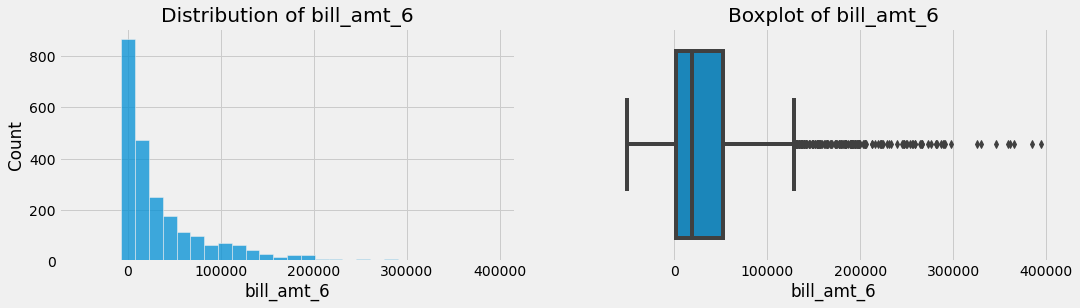

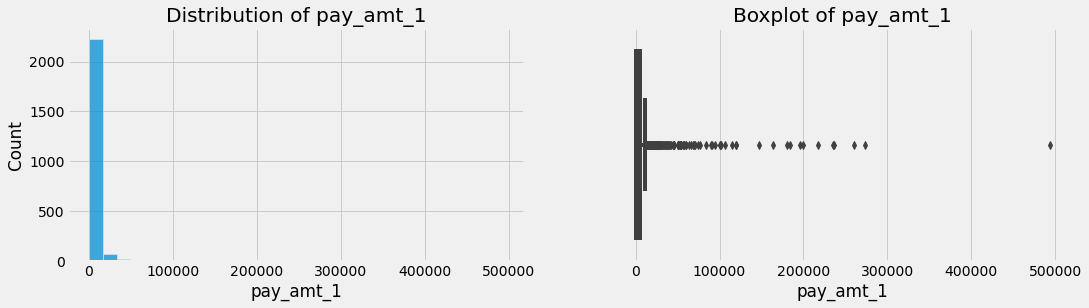

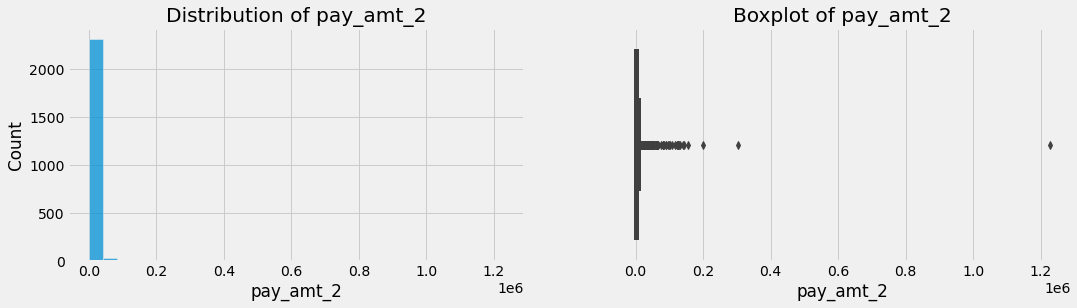

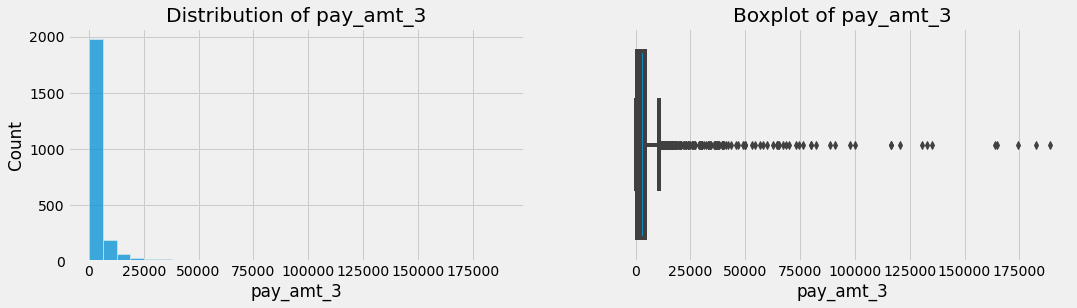

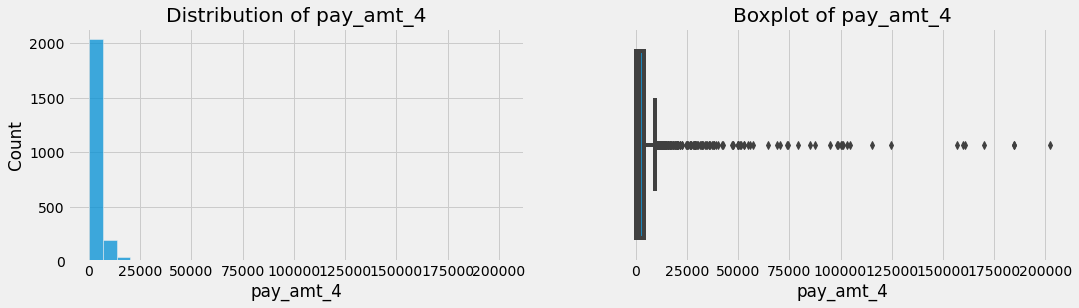

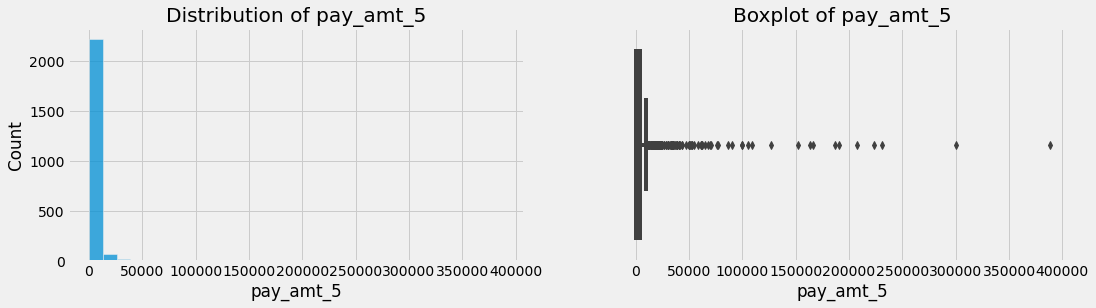

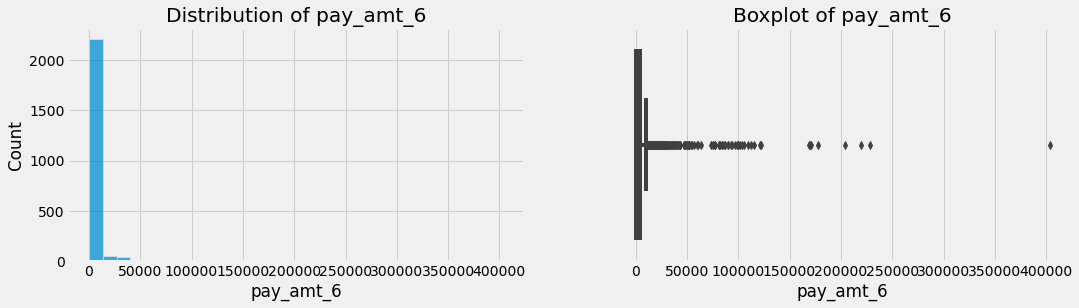

In [55]:
for column in num_columns:
    diagnostic_plots (X_train, column)

Visualisasi Histogram, Boxplot dan pengecekan nilai skew

In [56]:
def check_outliers(X_train, column):
    skewness = X_train[column].skew(axis=0, skipna=True)
    if skewness <= 0.5 and skewness >=-0.5:
       
        upper_boundary = X_train[column].mean() + 3 * X_train[column].std()
        lower_boundary = X_train[column].mean() - 3 * X_train[column].std()
        print(['Normal'])
        print(f'Upper Boundary of {column}:', upper_boundary)
        print(f'Lower Boundary of {column}:', lower_boundary)
        jumlah_outlier_upper = format(len(X_train[X_train[column] > upper_boundary]))
        print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
        jumlah_outlier_lower  = format(len(X_train[X_train[column]<lower_boundary]))
        print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
        persentase_outlier_upper = format(len(X_train[X_train[column] > upper_boundary])  / len(X_train)*100)
        print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
        persentase_outlier_lower = format(len(X_train[X_train[column] < lower_boundary])  / len(X_train)*100)
        print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
        print('-'*100)
    else:
         IQR = X_train[column].quantile(0.75) - X_train[column].quantile(0.25)
         lower_boundary = X_train[column].quantile(0.25) - (IQR * 1.5)
         upper_boundary = X_train[column].quantile(0.75) + (IQR * 1.5)
         print(['Skewed'])
         print(f'Upper Boundary of {column}:', upper_boundary)
         print(f'Lower Boundary of {column}:', lower_boundary)
         jumlah_outlier_upper = format(len(X_train[X_train[column] > upper_boundary]))
         print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
         jumlah_outlier_lower  = format(len(X_train[X_train[column]<lower_boundary]))
         print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
         persentase_outlier_upper = format(len(X_train[X_train[column] > upper_boundary])  / len(X_train)*100)
         print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
         persentase_outlier_lower = format(len(X_train[X_train[column] < lower_boundary])  / len(X_train)*100)
         print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
         print('-'*100)

Membuat fungsi cek jumlah outlier

In [57]:
outlier_feature = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

Masukan fitur yang akan di cek outlier

In [58]:
for feature in outlier_feature:
    check_outliers(X_train,feature)

['Skewed']
Upper Boundary of limit_balance: 500000.0
Lower Boundary of limit_balance: -220000.0
Total Data Above Upper Boundary limit_balance: 11
Total Data Below Lower Boundary limit_balance: 0
% Data Above Upper Boundary limit_balance: 0.4653130287648054
% Data Below Lower Boundary limit_balance: 0.0
----------------------------------------------------------------------------------------------------
['Skewed']
Upper Boundary of age: 60.5
Lower Boundary of age: 8.5
Total Data Above Upper Boundary age: 26
Total Data Below Lower Boundary age: 0
% Data Above Upper Boundary age: 1.0998307952622675
% Data Below Lower Boundary age: 0.0
----------------------------------------------------------------------------------------------------
['Skewed']
Upper Boundary of bill_amt_1: 168467.75
Lower Boundary of bill_amt_1: -94478.25
Total Data Above Upper Boundary bill_amt_1: 176
Total Data Below Lower Boundary bill_amt_1: 0
% Data Above Upper Boundary bill_amt_1: 7.4450084602368864
% Data Below Low

Memunculkan Jumlah outlier

In [59]:
print('X_train - Before Handling :', X_train.shape)
outlier_trimmer1 = OutlierTrimmer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['limit_balance', 'age', ],
                   missing_values='ignore'
                   )

outlier_trimmer1.fit(X_train)

X_train = outlier_trimmer1.transform(X_train)
print('X_train - After Handling : ', X_train.shape)

X_train - Before Handling : (2364, 23)
X_train - After Handling :  (2329, 23)


Handling Outlier kolom limit_balance dan age menggunakan Trimming dikarenakan jumlah outliernya dibawah 5%

In [60]:
print('X_train - Before Handling :', X_train.shape)
windsorizer = Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['bill_amt_1', 'bill_amt_2', 'bill_amt_3','bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                              'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'], 
                   missing_values='ignore'
                   )

windsorizer.fit(X_train)

X_train = windsorizer.transform(X_train)
print('X_train - After Handling : ', X_train.shape)

X_train - Before Handling : (2329, 23)
X_train - After Handling :  (2329, 23)


Handling Outlier menggunakan Capping dikarenakan jumlah outliernya berada pada range 5-15%

In [61]:
y_train = y_train[X_train.index]

Menyamakan index y_train dengan X_train yang sudah di trimming outlier

## Handling Missing Value

In [62]:
X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [63]:
X_test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

Tidak ada missing value pada data X_train dan X_test

## Fitur Selection

In [64]:
X_train.corr(method='pearson')

,limit_balance,education_level,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
limit_balance,1.000000,-0.204057,0.119772,-0.212588,-0.270530,-0.285097,-0.263588,-0.243958,-0.230788,0.225596,...,0.232401,0.242721,0.241634,0.238708,0.344257,0.357310,0.362869,0.354756,0.362115,0.370637
education_level,-0.204057,1.000000,0.201358,0.073402,0.089759,0.104175,0.094703,0.093956,0.068445,0.038917,...,0.030059,0.011142,0.001597,-0.001155,-0.048066,-0.067129,-0.055970,-0.063829,-0.077949,-0.082112
age,0.119772,0.201358,1.000000,-0.016019,-0.058348,-0.044194,-0.063023,-0.065704,-0.045699,0.059672,...,0.043727,0.025845,0.035954,0.036935,0.041893,0.030712,0.015721,0.056713,0.023977,0.014392
pay_0,-0.212588,0.073402,-0.016019,1.000000,0.661220,0.570890,0.541428,0.509175,0.478280,0.221577,...,0.216032,0.218455,0.209597,0.210955,-0.125151,-0.117732,-0.109471,-0.096141,-0.082331,-0.094999
pay_2,-0.270530,0.089759,-0.058348,0.661220,1.000000,0.774233,0.660696,0.612743,0.571411,0.287456,...,0.270683,0.272372,0.264501,0.265164,-0.093369,-0.041665,-0.035032,-0.031597,-0.012695,-0.039648
pay_3,-0.285097,0.104175,-0.044194,0.570890,0.774233,1.000000,0.759669,0.677736,0.616621,0.245657,...,0.262990,0.265416,0.261901,0.252402,0.056322,-0.100727,-0.042154,-0.025243,-0.021851,-0.037140
pay_4,-0.263588,0.094703,-0.063023,0.541428,0.660696,0.759669,1.000000,0.824796,0.725420,0.234702,...,0.289953,0.291879,0.292094,0.288571,0.024128,0.066176,-0.066625,-0.011832,-0.006667,-0.023003
pay_5,-0.243958,0.093956,-0.065704,0.509175,0.612743,0.677736,0.824796,1.000000,0.824699,0.227162,...,0.281919,0.323031,0.324024,0.311213,0.010622,0.047012,0.084174,-0.034090,0.013255,0.011068
pay_6,-0.230788,0.068445,-0.045699,0.478280,0.571411,0.616621,0.725420,0.824699,1.000000,0.237331,...,0.284755,0.317527,0.355347,0.349060,0.022552,0.034894,0.061270,0.099762,-0.004260,0.022939
bill_amt_1,0.225596,0.038917,0.059672,0.221577,0.287456,0.245657,0.234702,0.227162,0.237331,1.000000,...,0.885646,0.827894,0.802965,0.774859,0.448725,0.416844,0.360570,0.385290,0.372358,0.344569


Fitur Selection menggunakan pearson untuk fitur numerik tidak menggunakan hitmap correlation dikarenakan data numeriknya terlalu banyak

In [65]:
c = data.corr(method = "pearson")
c_sorted = c.sort_values( by=['default_payment_next_month'], ascending = False )
c_sorted["default_payment_next_month"]

default_payment_next_month    1.000000
pay_0                         0.356963
pay_2                         0.288813
pay_3                         0.275758
pay_4                         0.255805
pay_5                         0.253319
pay_6                         0.237170
education_level               0.044104
age                           0.016905
bill_amt_6                    0.006116
bill_amt_5                    0.005930
bill_amt_2                    0.000877
bill_amt_3                   -0.001075
bill_amt_4                   -0.004718
bill_amt_1                   -0.005961
pay_amt_4                    -0.053684
pay_amt_2                    -0.059265
pay_amt_5                    -0.066159
pay_amt_1                    -0.066163
pay_amt_6                    -0.066966
pay_amt_3                    -0.090248
limit_balance                -0.161909
Name: default_payment_next_month, dtype: float64

Drop Kolom yang memiliki korelasi kecil
1. Kolom numerik di drop berdasarkan pearson korelasi dengan data y
- 0 : Tidak ada korelasi
- 0.00 - 0.25 : korelasi sangat lemah
- 0.25 - 0.50 : korelasi cukup
- 0.50 - 0.75 : korleasi kuat
- 0.75 - 0.99 : korelasi sangat kuat
- 1 : korelasi sempurna
- Sumber : http://www.statistikolahdata.com/2010/11/korelasi-pearson.html#:~:text=0%20%3A%20Tidak%20ada%20korelasi,0.50%20%2D%200.75%20%3A%20korleasi%20kuat
2. kolom categorical di drop berasarkan explore data analisis

In [66]:
X_train.drop('sex', axis=1, inplace=True)
X_test.drop('sex', axis=1, inplace=True)
X_train.drop('age', axis=1, inplace=True)
X_test.drop('age', axis=1, inplace=True)

Untuk fitur bill_amt_1 sampai bill_amt_6 tidak saya drop walaupun memiliki korelasi yang kecil terhadap target, karena menurut saya jumlah tagihan tagihan bulanan akan berpengaruh terhadap klien akan membayar atau tidak tagihanya

## Split antara fitur numerik dan kategorikal


In [67]:
num_columns_tra = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

num_columns = X_test.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_test.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numerical Columns:  ['limit_balance', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns:  ['marital_status']


In [68]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]
X_train_num

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1221,360000.0,2,0.0,0.0,0.0,0.0,0,0,16557.0,18369.0,20067.0,48307.0,12918.0,12375.0,3000.0,2000.0,10536.0,1066.0,1000.0,1000.0
884,50000.0,2,0.0,0.0,0.0,0.0,0,0,51734.0,51665.0,51105.0,47494.0,31375.0,30781.0,2003.0,1680.0,1860.0,1061.0,1392.0,8000.0
1103,80000.0,2,0.0,0.0,2.0,0.0,0,0,77714.0,79049.0,79206.0,78031.0,78293.0,78870.0,5000.0,3000.0,3000.0,3000.0,3000.0,5000.0
2496,310000.0,2,-2.0,-1.0,0.0,0.0,0,0,-2123.0,162669.0,152072.5,141305.0,129579.5,127550.5,11129.0,10000.0,10000.0,9548.5,9422.5,9938.5
2755,370000.0,3,-1.0,-1.0,-1.0,2.0,-1,-1,2804.0,1674.0,39811.0,35194.0,3728.0,2241.0,1674.0,11002.5,0.0,3728.0,2300.0,9938.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,240000.0,2,0.0,0.0,0.0,0.0,-2,-2,166716.5,162669.0,152072.5,0.0,0.0,0.0,7053.0,6520.0,0.0,0.0,0.0,0.0
2544,200000.0,3,2.0,-1.0,2.0,2.0,2,0,570.0,52439.0,51040.0,56205.0,54723.0,58657.0,11129.0,0.0,6000.0,0.0,5000.0,2286.0
1556,190000.0,1,0.0,0.0,0.0,0.0,-2,-2,166716.5,150621.0,152072.5,0.0,0.0,0.0,6561.0,6900.0,0.0,0.0,0.0,0.0
2588,350000.0,1,-1.0,-1.0,-1.0,-1.0,-1,-1,148341.0,8095.0,15047.0,3220.0,20461.0,3249.0,8405.0,11002.5,3805.0,9548.5,3253.0,9938.5


In [69]:
X_train_num1 = X_train_num.drop(columns=['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'])
X_test_num1 = X_test_num.drop(columns=['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'])
X_train_num1

,limit_balance,education_level,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1221,360000.0,2,16557.0,18369.0,20067.0,48307.0,12918.0,12375.0,3000.0,2000.0,10536.0,1066.0,1000.0,1000.0
884,50000.0,2,51734.0,51665.0,51105.0,47494.0,31375.0,30781.0,2003.0,1680.0,1860.0,1061.0,1392.0,8000.0
1103,80000.0,2,77714.0,79049.0,79206.0,78031.0,78293.0,78870.0,5000.0,3000.0,3000.0,3000.0,3000.0,5000.0
2496,310000.0,2,-2123.0,162669.0,152072.5,141305.0,129579.5,127550.5,11129.0,10000.0,10000.0,9548.5,9422.5,9938.5
2755,370000.0,3,2804.0,1674.0,39811.0,35194.0,3728.0,2241.0,1674.0,11002.5,0.0,3728.0,2300.0,9938.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,240000.0,2,166716.5,162669.0,152072.5,0.0,0.0,0.0,7053.0,6520.0,0.0,0.0,0.0,0.0
2544,200000.0,3,570.0,52439.0,51040.0,56205.0,54723.0,58657.0,11129.0,0.0,6000.0,0.0,5000.0,2286.0
1556,190000.0,1,166716.5,150621.0,152072.5,0.0,0.0,0.0,6561.0,6900.0,0.0,0.0,0.0,0.0
2588,350000.0,1,148341.0,8095.0,15047.0,3220.0,20461.0,3249.0,8405.0,11002.5,3805.0,9548.5,3253.0,9938.5


Drop kolom kategorikal berbentuk numerik agar tidak masuk saat proses scaling

In [70]:
X_train_num2 = X_train_num[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
X_test_num2 = X_test_num[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
X_train_num2

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
1221,0.0,0.0,0.0,0.0,0,0
884,0.0,0.0,0.0,0.0,0,0
1103,0.0,0.0,2.0,0.0,0,0
2496,-2.0,-1.0,0.0,0.0,0,0
2755,-1.0,-1.0,-1.0,2.0,-1,-1
...,...,...,...,...,...,...
1572,0.0,0.0,0.0,0.0,-2,-2
2544,2.0,-1.0,2.0,2.0,2,0
1556,0.0,0.0,0.0,0.0,-2,-2
2588,-1.0,-1.0,-1.0,-1.0,-1,-1


Fitur numerik kategorikal yang tidak diikutsertakan pada proses scaling

## Fitur Scaling

In [71]:
scaler = MinMaxScaler()
scaler.fit(X_train_num1)

X_train_num_scaled = scaler.transform(X_train_num1)
X_test_num_scaled = scaler.transform(X_test_num1)

X_train_num_scaled

array([[0.71428571, 0.2       , 0.12900775, ..., 0.11164057, 0.10612895,
        0.10061881],
       [0.08163265, 0.2       , 0.33305008, ..., 0.11111693, 0.14773149,
        0.80495045],
       [0.14285714, 0.2       , 0.4837457 , ..., 0.31418547, 0.31838684,
        0.50309403],
       ...,
       [0.36734694, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.69387755, 0.        , 0.89341388, ..., 1.        , 0.34523746,
        1.        ],
       [0.51020408, 0.2       , 0.14708774, ..., 0.31418547, 0.31838684,
        0.30185642]])

Fitur Scaling menggunakan MinMax Scaller dikarenakan datanya berdistribusi skew

In [72]:
X_train_num_final = np.concatenate([X_train_num_scaled, X_train_num2], axis=1)
X_test_num_final = np.concatenate([X_test_num_scaled, X_test_num2], axis=1)
X_train_num_final

array([[ 0.71428571,  0.2       ,  0.12900775, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08163265,  0.2       ,  0.33305008, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14285714,  0.2       ,  0.4837457 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.36734694,  0.        ,  1.        , ...,  0.        ,
        -2.        , -2.        ],
       [ 0.69387755,  0.        ,  0.89341388, ..., -1.        ,
        -1.        , -1.        ],
       [ 0.51020408,  0.2       ,  0.14708774, ...,  0.        ,
         0.        ,  0.        ]])

Menggabungkan kembail data numerik dan data kategorikal berbentuk numerik, data kategorikal berbentuk numerik tidak dilakukan encoding dikarenakan datanya sudah berbentuk tingkatan

## Fitur Encoding

In [73]:
encoder = OneHotEncoder()
encoder.fit(X_train_cat)
X_train_cat_enc = encoder.transform(X_train_cat).toarray()
OHE_model = OneHotEncoder(handle_unknown = 'ignore')
X_test_cat_enc = encoder.transform(X_test_cat).toarray()
OHE_model = OneHotEncoder(handle_unknown = 'ignore')
X_train_cat_enc

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

Fitur Enoding menggunakan OneHotEncoder dikarenakan data kategorikalnya berbentuk numerik

## Menggabungkan kolom numerik dan kategorikal

In [74]:
X_train_final = np.concatenate([X_train_num_final, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_final, X_test_cat_enc], axis=1)
X_train_final

array([[0.71428571, 0.2       , 0.12900775, ..., 1.        , 0.        ,
        0.        ],
       [0.08163265, 0.2       , 0.33305008, ..., 1.        , 0.        ,
        0.        ],
       [0.14285714, 0.2       , 0.4837457 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.36734694, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.69387755, 0.        , 0.89341388, ..., 0.        , 0.        ,
        1.        ],
       [0.51020408, 0.2       , 0.14708774, ..., 0.        , 0.        ,
        1.        ]])

# 6. Model Definition

In [75]:
lr = LogisticRegression()

Model Definition Logistic Regression

In [76]:
clf = SVC()

Model Definition SVM

In [77]:
dt = DecisionTreeClassifier()

Model Definition Decisiton Tree

In [78]:
rf = RandomForestClassifier()

Model Definition Random Forest

In [79]:
knn = KNeighborsClassifier()

Model Definition K-Nearest Neighbor

In [80]:
nb = GaussianNB()

Model Definition Naive Bayes

In [81]:
sgd = SGDClassifier()

Model Definition SGDClassifier

# 7. Model Training

In [82]:
lr.fit(X_train_final, y_train)

LogisticRegression()

Model Training Logistic Regression

In [83]:
clf.fit(X_train_final, y_train)

SVC()

Model Training SVM

In [84]:
dt.fit(X_train_final, y_train)

DecisionTreeClassifier()

Model Training Decision Tree

In [85]:
rf.fit(X_train_final, y_train)

RandomForestClassifier()

Model Training Random Forest

In [86]:
knn.fit(X_train_final, y_train)

KNeighborsClassifier()

In [87]:
nb.fit(X_train_final, y_train)

GaussianNB()

Model Training Naive Bayes

In [88]:
sgd.fit(X_train_final, y_train)

SGDClassifier()

Model Training SGDClassifier

# 8. Model Evaluation

Untuk metrics penilainya menggunakan Precision dikarenakan False Positive yang paling berbahaya. Model memprediksi klien melakukan pembayaran padahal kenyataanya klien tidak akan membayar, maka akan menggunakan Precision untuk meminimalkan False Positive

Logistic Regression
Precision - Train Set Logistic  :  0.7511961722488039 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1828
           1       0.75      0.31      0.44       501

    accuracy                           0.83      2329
   macro avg       0.79      0.64      0.67      2329
weighted avg       0.82      0.83      0.80      2329
 

Confusion Matrix      : 


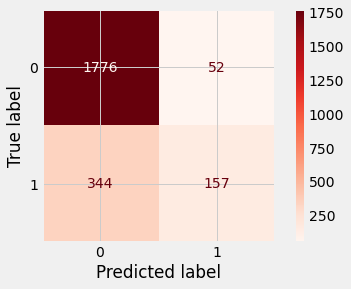

In [89]:
y_pred_train = lr.predict(X_train_final)

print('Logistic Regression')
print('Precision - Train Set Logistic  : ', precision_score (y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr, X_train_final, y_train, cmap='Reds'))

Model Evaluation Logistic Regression

SVM Classifier
Precision - Train Set Logistic  :  0.7424749163879598 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1828
           1       0.74      0.44      0.56       501

    accuracy                           0.85      2329
   macro avg       0.80      0.70      0.73      2329
weighted avg       0.84      0.85      0.83      2329
 

Confusion Matrix      : 


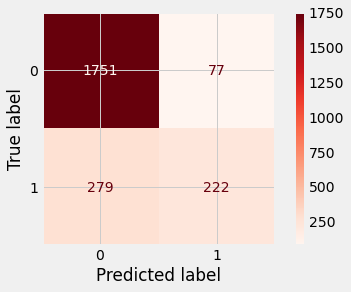

In [90]:
y_pred_train = clf.predict(X_train_final)

print('SVM Classifier')
print('Precision - Train Set Logistic  : ', precision_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(clf, X_train_final, y_train, cmap='Reds'))

Model Evaluation Support Vector Classifier

SVM Classifier
Precision - Train Set Logistic  :  0.9979959919839679 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1828
           1       1.00      0.99      1.00       501

    accuracy                           1.00      2329
   macro avg       1.00      1.00      1.00      2329
weighted avg       1.00      1.00      1.00      2329
 

Confusion Matrix      : 


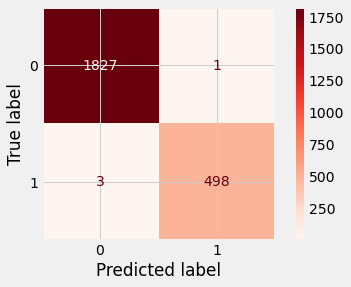

In [91]:
y_pred_train = dt.predict(X_train_final)

print('SVM Classifier')
print('Precision - Train Set Logistic  : ', precision_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt, X_train_final, y_train, cmap='Reds'))

Model Evaluation Decision Tree

SVM Classifier
Precision - Train Set Logistic  :  0.9979959919839679 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1828
           1       1.00      0.99      1.00       501

    accuracy                           1.00      2329
   macro avg       1.00      1.00      1.00      2329
weighted avg       1.00      1.00      1.00      2329
 

Confusion Matrix      : 


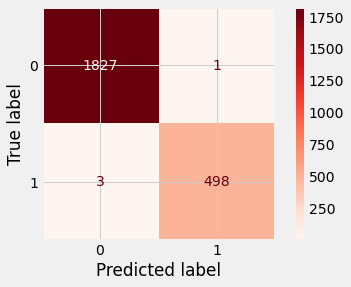

In [92]:
y_pred_train = rf.predict(X_train_final)

print('SVM Classifier')
print('Precision - Train Set Logistic  : ', precision_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final, y_train, cmap='Reds'))

Model Evaluation Random Forest

SVM Classifier
Precision - Train Set Logistic  :  0.7447447447447447 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1828
           1       0.74      0.50      0.59       501

    accuracy                           0.85      2329
   macro avg       0.81      0.72      0.75      2329
weighted avg       0.85      0.85      0.84      2329
 

Confusion Matrix      : 


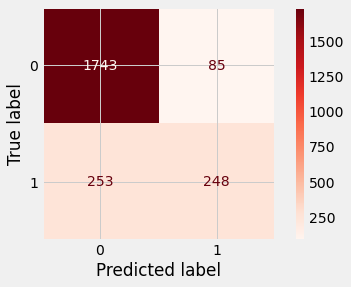

In [93]:
y_pred_train = knn.predict(X_train_final)

print('SVM Classifier')
print('Precision - Train Set Logistic  : ', precision_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_train_final, y_train, cmap='Reds'))

Model Evaluation K-NN

SVM Classifier
Precision - Train Set Logistic  :  0.5387840670859538 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      1828
           1       0.54      0.51      0.53       501

    accuracy                           0.80      2329
   macro avg       0.70      0.70      0.70      2329
weighted avg       0.80      0.80      0.80      2329
 

Confusion Matrix      : 


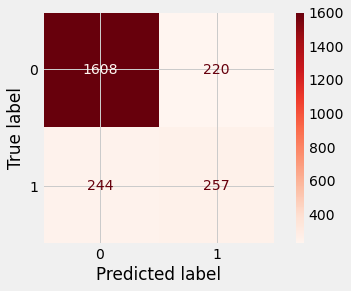

In [94]:
y_pred_train = nb.predict(X_train_final)

print('SVM Classifier')
print('Precision - Train Set Logistic  : ', precision_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb, X_train_final, y_train, cmap='Reds'))

Model Evaluation Naive Bayes

SVM Classifier
Precision - Train Set Logistic  :  0.616504854368932 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1828
           1       0.62      0.51      0.56       501

    accuracy                           0.83      2329
   macro avg       0.74      0.71      0.72      2329
weighted avg       0.82      0.83      0.82      2329
 

Confusion Matrix      : 


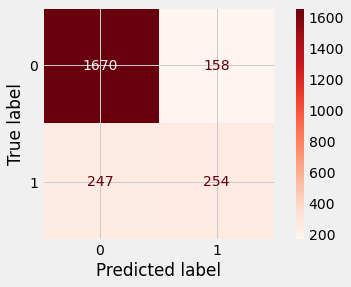

In [95]:
y_pred_train = sgd.predict(X_train_final)

print('SVM Classifier')
print('Precision - Train Set Logistic  : ', precision_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(sgd, X_train_final, y_train, cmap='Reds'))

Model Evaluation SGD Classifier

## Cross Validation

In [96]:
acc_train_cross_val = cross_val_score(lr, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="precision")

print('Precision - All - Cross Validation  : ', acc_train_cross_val)
print('Precision - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Precision - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Precision - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Precision - All - Cross Validation  :  [0.81081081 0.74418605 0.76923077 0.65217391 0.66666667]
Precision - Mean - Cross Validation :  0.7286136412526706
Precision - Std - Cross Validation  :  0.060545991251547485
Precision - Range of Test-Set       :  0.6680676500011231 - 0.7891596325042181


Cross Validation Logistic Regression mendapatkan nilai mean precision 73%

In [97]:
acc_train_cross_val = cross_val_score(clf, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="precision")

print('Precision - All - Cross Validation  : ', acc_train_cross_val)
print('Precision - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Precision - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Precision - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Precision - All - Cross Validation  :  [0.79245283 0.77083333 0.75862069 0.70967742 0.59677419]
Precision - Mean - Cross Validation :  0.7256716932160823
Precision - Std - Cross Validation  :  0.06993613168700136
Precision - Range of Test-Set       :  0.655735561529081 - 0.7956078249030836


Cross Validation SVC mendapatkan nilai mean precision 73%

In [98]:
acc_train_cross_val = cross_val_score(dt, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="precision")

print('Precision - All - Cross Validation  : ', acc_train_cross_val)
print('Precision - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Precision - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Precision - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Precision - All - Cross Validation  :  [0.36936937 0.35643564 0.38135593 0.33980583 0.36842105]
Precision - Mean - Cross Validation :  0.36307756460228263
Precision - Std - Cross Validation  :  0.014056509962299376
Precision - Range of Test-Set       :  0.34902105463998323 - 0.37713407456458203


Cross Validation Decision Tree mendapatkan nilai mean precision 36%

In [99]:
acc_train_cross_val = cross_val_score(rf, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="precision")

print('Precision - All - Cross Validation  : ', acc_train_cross_val)
print('Precision - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Precision - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Precision - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Precision - All - Cross Validation  :  [0.6440678  0.69642857 0.69230769 0.66153846 0.61818182]
Precision - Mean - Cross Validation :  0.6625048680133425
Precision - Std - Cross Validation  :  0.029476832526892986
Precision - Range of Test-Set       :  0.6330280354864495 - 0.6919817005402356


Cross Validation Random Forest mendapatkan nilai mean precision 66%

In [100]:
acc_train_cross_val = cross_val_score(knn, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="precision")

print('Precision - All - Cross Validation  : ', acc_train_cross_val)
print('Precision - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Precision - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Precision - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Precision - All - Cross Validation  :  [0.6440678  0.62068966 0.58571429 0.578125   0.53623188]
Precision - Mean - Cross Validation :  0.5929657243109681
Precision - Std - Cross Validation  :  0.037071814698855045
Precision - Range of Test-Set       :  0.555893909612113 - 0.6300375390098231


Cross Validation K-NN mendapatkan nilai mean precision 59%

In [101]:
acc_train_cross_val = cross_val_score(nb, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="precision")

print('Precision - All - Cross Validation  : ', acc_train_cross_val)
print('Precision - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Precision - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Precision - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Precision - All - Cross Validation  :  [0.59090909 0.55555556 0.5212766  0.51485149 0.51515152]
Precision - Mean - Cross Validation :  0.5395488485018716
Precision - Std - Cross Validation  :  0.029776346393973845
Precision - Range of Test-Set       :  0.5097725021078977 - 0.5693251948958454


Cross Validation Naive Bayes mendapatkan nilai mean precision 54%

In [102]:
acc_train_cross_val = cross_val_score(sgd, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="precision")

print('Precision - All - Cross Validation  : ', acc_train_cross_val)
print('Precision - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Precision - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Precision - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Precision - All - Cross Validation  :  [0.71830986 0.63636364 0.725      0.61842105 0.51685393]
Precision - Mean - Cross Validation :  0.642989696146883
Precision - Std - Cross Validation  :  0.07610068416984964
Precision - Range of Test-Set       :  0.5668890119770333 - 0.7190903803167326


Cross Validation SGD Classifier mendapatkan nilai mean precision 64%

Dari hasil pengecekan Cross Validation diatas didapatkan nilai tertinggi pada model Logistic Regression dan Support Vector Classifer dengan nilai precision mean cross validation sebesar 73%, dikarenakan memiliki nilai yang sama, maka saya lanjutkan dengan cek test-set kedua model tersebut untuk menentukan model apa yang akan dilakukan hyperparamater tunning

Precision - Test Set   :  0.6379310344827587 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       464
           1       0.64      0.29      0.40       127

    accuracy                           0.81       591
   macro avg       0.73      0.62      0.64       591
weighted avg       0.79      0.81      0.78       591
 

Confusion Matrix      : 


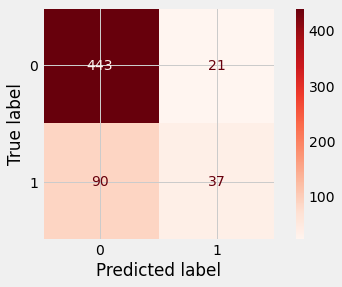

In [103]:
# Check Performance Model against Test-Set

y_pred_test = lr.predict(X_test_final)

print('Precision - Test Set   : ', precision_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr, X_test_final, y_test, cmap='Reds'))

Precision - Test Set   :  0.71875 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       464
           1       0.72      0.36      0.48       127

    accuracy                           0.83       591
   macro avg       0.78      0.66      0.69       591
weighted avg       0.82      0.83      0.81       591
 

Confusion Matrix      : 


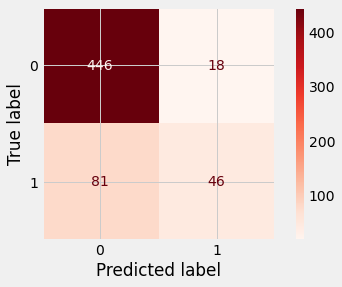

In [104]:
# Check Performance Model against Test-Set

y_pred_test = clf.predict(X_test_final)

print('Precision - Test Set   : ', precision_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(clf, X_test_final, y_test, cmap='Reds'))

Model SVC memiliki hasil test set yang lebih baik dibandingkan dengan Logistic Regression dengan nilai precision 72% sedangkan Logistic Regression hanya mendapatkan hasil 64%. maka dipilih lah model SVC untuk dilakukan hyperparamater tunning

## Hyperparamater Tunning

Untuk Hyperparamater Tunning akan menggunakan Grid Search CV

Paramater yang di berikan untuk hyperparamater tunning menggunakan GridsearchCV pada Support Vector Classifier adalah 
1. C = [0.1,1, 10, 100], 
2. gamma = [1,0.1,0.01,0.001], 
3. kernel =  ['rbf', 'poly', 'sigmoid']

Untuk default paramater SVC adalah 
1. C = 1.0
2. gamma = 1
3. kernel = rbf

In [105]:
C =  [0.1,1, 10, 100]
gamma = [1,0.1,0.01,0.001]
kernel =  ['rbf', 'poly', 'sigmoid']
random_grid = {'C':C,
               'gamma':gamma,
               'kernel':kernel            
               }
random_grid

{'C': [0.1, 1, 10, 100],
 'gamma': [1, 0.1, 0.01, 0.001],
 'kernel': ['rbf', 'poly', 'sigmoid']}

Menentukan paramater yang akan digunakan

In [106]:
clf_gridcv = GridSearchCV(estimator=SVC(),
                         param_grid=random_grid,
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

clf_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

Fit model menggunakan paramater yang telah atur

In [107]:
clf_gridcv.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Best paramater dari GridSearch CV adalah 'C': 1, 'gamma': 0.01, 'kernel': 'rbf' 

In [108]:
clf_gridcv_best = clf_gridcv.best_estimator_

Precision - Train Set   :  0.7491525423728813 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1828
           1       0.75      0.44      0.56       501

    accuracy                           0.85      2329
   macro avg       0.81      0.70      0.73      2329
weighted avg       0.84      0.85      0.83      2329
 

Confusion Matrix      : 
Precision - Test Set   :  0.7301587301587301 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       464
           1       0.73      0.36      0.48       127

    accuracy                           0.83       591
   macro avg       0.79      0.66      0.69       591
weighted avg       0.82      0.83      0.81       591
 

Confusion Matrix      : 


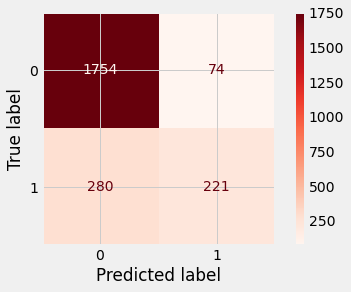

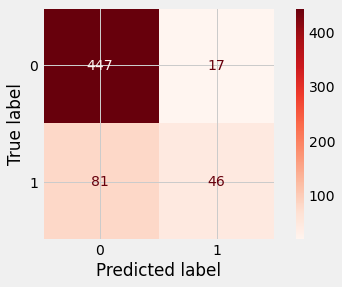

In [109]:
# Check Performance Model against Train-Set
y_pred_train = clf_gridcv_best.predict(X_train_final)

print('Precision - Train Set   : ', precision_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(clf_gridcv_best, X_train_final, y_train, cmap='Reds'))

# Check Performance Model against Test-Set
y_pred_test = clf_gridcv_best.predict(X_test_final)

print('Precision - Test Set   : ', precision_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(clf_gridcv_best, X_test_final, y_test, cmap='Reds'))

Setelah dilakukan Hyperparamater Tunning terjadi peningkatan nilai Precision Score yang tidak terlalu besar. Pada saat menggunakan baseline paramater didapatkan nilai precision sebesar 72% dan setelah dilakukan hyperparamater tunning terjadi peningkatan hanya 1% mejadi 73% dan modelnya bisa dikatakan goodfit karena hasil precision train set dan test set nya memiliki gap yang sangat dekat hanya berbeda 2%.

# 9. Model Inference

In [110]:
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,200000.0,male,2,married,39.0,-1.0,-1.0,2.0,-1.0,0,...,617.0,620.0,0.0,1879.0,8.0,617.0,3.0,0.0,0.0,0
1,180000.0,female,2,single,29.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,210000.0,male,5,married,31.0,2.0,0.0,0.0,0.0,0,...,126946.0,93925.0,-285.0,9234.0,5185.0,4900.0,4526.0,21787.0,152951.0,0
3,30000.0,female,1,single,27.0,1.0,2.0,0.0,0.0,2,...,30444.0,29887.0,29153.0,0.0,2000.0,3000.0,0.0,1000.0,1000.0,0
4,350000.0,female,1,married,55.0,-1.0,-1.0,-1.0,-1.0,-1,...,7461.0,4124.0,1261.0,1935.0,1630.0,7461.0,4124.0,1261.0,2798.0,0
5,220000.0,male,2,married,40.0,-1.0,-1.0,-1.0,-1.0,-1,...,4887.0,3083.0,9401.0,1000.0,11289.0,4887.0,3083.0,10020.0,6473.0,0
6,50000.0,female,1,single,25.0,0.0,0.0,0.0,0.0,0,...,38008.0,31898.0,20154.0,2000.0,5040.0,8034.0,3029.0,5000.0,49436.0,0
7,20000.0,male,2,married,25.0,0.0,0.0,0.0,0.0,0,...,17322.0,17119.0,17350.0,1552.0,2659.0,1419.0,606.0,500.0,1000.0,0
8,170000.0,male,1,single,32.0,2.0,2.0,-2.0,-2.0,-2,...,0.0,0.0,6271.0,0.0,0.0,0.0,0.0,6271.0,0.0,1
9,50000.0,male,2,single,23.0,-1.0,-1.0,-1.0,-1.0,0,...,1695.0,12645.0,12584.0,350.0,400.0,1695.0,11300.0,485.0,2400.0,0


In [111]:
data_inf.drop('sex', axis=1, inplace=True)
data_inf.drop('age', axis=1, inplace=True)

Drop kolom inference sama seperti pada train set dan test set

In [112]:
data_inf

,limit_balance,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,200000.0,2,married,-1.0,-1.0,2.0,-1.0,0,0,162.0,...,617.0,620.0,0.0,1879.0,8.0,617.0,3.0,0.0,0.0,0
1,180000.0,2,single,-1.0,-1.0,-2.0,-2.0,-2,-2,4184.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,210000.0,5,married,2.0,0.0,0.0,0.0,0,-1,195615.0,...,126946.0,93925.0,-285.0,9234.0,5185.0,4900.0,4526.0,21787.0,152951.0,0
3,30000.0,1,single,1.0,2.0,0.0,0.0,2,0,28686.0,...,30444.0,29887.0,29153.0,0.0,2000.0,3000.0,0.0,1000.0,1000.0,0
4,350000.0,1,married,-1.0,-1.0,-1.0,-1.0,-1,-1,3518.0,...,7461.0,4124.0,1261.0,1935.0,1630.0,7461.0,4124.0,1261.0,2798.0,0
5,220000.0,2,married,-1.0,-1.0,-1.0,-1.0,-1,-1,2300.0,...,4887.0,3083.0,9401.0,1000.0,11289.0,4887.0,3083.0,10020.0,6473.0,0
6,50000.0,1,single,0.0,0.0,0.0,0.0,0,0,45342.0,...,38008.0,31898.0,20154.0,2000.0,5040.0,8034.0,3029.0,5000.0,49436.0,0
7,20000.0,2,married,0.0,0.0,0.0,0.0,0,0,14447.0,...,17322.0,17119.0,17350.0,1552.0,2659.0,1419.0,606.0,500.0,1000.0,0
8,170000.0,1,single,2.0,2.0,-2.0,-2.0,-2,-1,2097.0,...,0.0,0.0,6271.0,0.0,0.0,0.0,0.0,6271.0,0.0,1
9,50000.0,2,single,-1.0,-1.0,-1.0,-1.0,0,0,350.0,...,1695.0,12645.0,12584.0,350.0,400.0,1695.0,11300.0,485.0,2400.0,0


Fitur Terbaru data Inference

In [113]:
data_inf_numeric = data_inf[num_columns]
data_inf_categorical = data_inf[cat_columns]

Memisahkan kolom numerik dan kategorikal

In [114]:
data_inf_numeric1 = data_inf_numeric.drop(columns=['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'])
data_inf_numeric1

,limit_balance,education_level,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,200000.0,2,162.0,1879.0,1707.0,617.0,620.0,0.0,1879.0,8.0,617.0,3.0,0.0,0.0
1,180000.0,2,4184.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,210000.0,5,195615.0,199825.0,124788.0,126946.0,93925.0,-285.0,9234.0,5185.0,4900.0,4526.0,21787.0,152951.0
3,30000.0,1,28686.0,27620.0,28164.0,30444.0,29887.0,29153.0,0.0,2000.0,3000.0,0.0,1000.0,1000.0
4,350000.0,1,3518.0,1931.0,1630.0,7461.0,4124.0,1261.0,1935.0,1630.0,7461.0,4124.0,1261.0,2798.0
5,220000.0,2,2300.0,1000.0,11289.0,4887.0,3083.0,9401.0,1000.0,11289.0,4887.0,3083.0,10020.0,6473.0
6,50000.0,1,45342.0,44719.0,40002.0,38008.0,31898.0,20154.0,2000.0,5040.0,8034.0,3029.0,5000.0,49436.0
7,20000.0,2,14447.0,15455.0,17562.0,17322.0,17119.0,17350.0,1552.0,2659.0,1419.0,606.0,500.0,1000.0
8,170000.0,1,2097.0,0.0,0.0,0.0,0.0,6271.0,0.0,0.0,0.0,0.0,6271.0,0.0
9,50000.0,2,350.0,350.0,400.0,1695.0,12645.0,12584.0,350.0,400.0,1695.0,11300.0,485.0,2400.0


Drop kolom kategorikal berbentuk numerik agar tidak masuk saat proses scaling

In [115]:
data_inf_numeric2 = data_inf_numeric[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
data_inf_numeric2

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,-1.0,-1.0,2.0,-1.0,0,0
1,-1.0,-1.0,-2.0,-2.0,-2,-2
2,2.0,0.0,0.0,0.0,0,-1
3,1.0,2.0,0.0,0.0,2,0
4,-1.0,-1.0,-1.0,-1.0,-1,-1
5,-1.0,-1.0,-1.0,-1.0,-1,-1
6,0.0,0.0,0.0,0.0,0,0
7,0.0,0.0,0.0,0.0,0,0
8,2.0,2.0,-2.0,-2.0,-2,-1
9,-1.0,-1.0,-1.0,-1.0,0,0


Fitur yang di drop dari proses scaling

In [116]:
data_inf_num_scaled = scaler.transform(data_inf_numeric1)
data_inf_num_enc = encoder.transform(data_inf_categorical).toarray()

Melakukan scaling dan encoding sama seperti pada data train dan test menggunakan MinMax Scaller dan OneHotEncoder

In [117]:
data_inf_num_final = np.concatenate([data_inf_num_scaled, data_inf_numeric2], axis=1)
data_inf_num_final

array([[ 3.87755102e-01,  2.00000000e-01,  3.39094144e-02,
         3.01505246e-01,  1.52944391e-01,  2.51388800e-01,
         2.68134263e-01,  2.86364895e-01,  1.68838171e-01,
         7.27107476e-04,  5.85611238e-02,  3.14185474e-04,
         0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
        -1.00000000e+00,  2.00000000e+00, -1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 3.46938776e-01,  2.00000000e-01,  5.72388131e-02,
         2.93342601e-01,  1.43328329e-01,  2.48105698e-01,
         2.64615664e-01,  2.86364895e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -2.00000000e+00, -2.00000000e+00,
        -2.00000000e+00, -2.00000000e+00],
       [ 4.08163265e-01,  8.00000000e-01,  1.16762422e+00,
         1.16141098e+00,  8.46297929e-01,  9.23594704e-01,
         7.97655024e-01,  2.84770342e-01,  8.29724144e-01,
         4.71256533e-01,  4.6

Menggabungkan kembail data numerik dan data kategorikal berbentuk numerik, data kategorikal berbentuk numerik tidak dilakukan encoding dikarenakan datanya sudah berbentuk tingkatan

In [118]:
data_inf_final = np.concatenate([data_inf_num_final, data_inf_num_enc], axis=1)
data_inf_final

array([[ 3.87755102e-01,  2.00000000e-01,  3.39094144e-02,
         3.01505246e-01,  1.52944391e-01,  2.51388800e-01,
         2.68134263e-01,  2.86364895e-01,  1.68838171e-01,
         7.27107476e-04,  5.85611238e-02,  3.14185474e-04,
         0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
        -1.00000000e+00,  2.00000000e+00, -1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 3.46938776e-01,  2.00000000e-01,  5.72388131e-02,
         2.93342601e-01,  1.43328329e-01,  2.48105698e-01,
         2.64615664e-01,  2.86364895e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -2.00000000e+00, -2.00000000e+00,
        -2.00000000e+00, -2.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 4.08163265e-01,  8.00000000e-01,  1.16762422e+00,
         1.16141098e+00,  8.4

Menggabungkan data hasil scaling dan encoding

In [119]:
y_pred_inf = lr.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Default Payment - Prediction'])
y_pred_inf_df

,Default Payment - Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Mendapatkan hasil prediksi data inference menggunakan model SVC Grid Search CV

In [120]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,limit_balance,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Default Payment - Prediction
0,200000.0,2,married,-1.0,-1.0,2.0,-1.0,0,0,162.0,...,620.0,0.0,1879.0,8.0,617.0,3.0,0.0,0.0,0,0
1,180000.0,2,single,-1.0,-1.0,-2.0,-2.0,-2,-2,4184.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,210000.0,5,married,2.0,0.0,0.0,0.0,0,-1,195615.0,...,93925.0,-285.0,9234.0,5185.0,4900.0,4526.0,21787.0,152951.0,0,0
3,30000.0,1,single,1.0,2.0,0.0,0.0,2,0,28686.0,...,29887.0,29153.0,0.0,2000.0,3000.0,0.0,1000.0,1000.0,0,0
4,350000.0,1,married,-1.0,-1.0,-1.0,-1.0,-1,-1,3518.0,...,4124.0,1261.0,1935.0,1630.0,7461.0,4124.0,1261.0,2798.0,0,0
5,220000.0,2,married,-1.0,-1.0,-1.0,-1.0,-1,-1,2300.0,...,3083.0,9401.0,1000.0,11289.0,4887.0,3083.0,10020.0,6473.0,0,0
6,50000.0,1,single,0.0,0.0,0.0,0.0,0,0,45342.0,...,31898.0,20154.0,2000.0,5040.0,8034.0,3029.0,5000.0,49436.0,0,0
7,20000.0,2,married,0.0,0.0,0.0,0.0,0,0,14447.0,...,17119.0,17350.0,1552.0,2659.0,1419.0,606.0,500.0,1000.0,0,0
8,170000.0,1,single,2.0,2.0,-2.0,-2.0,-2,-1,2097.0,...,0.0,6271.0,0.0,0.0,0.0,0.0,6271.0,0.0,1,0
9,50000.0,2,single,-1.0,-1.0,-1.0,-1.0,0,0,350.0,...,12645.0,12584.0,350.0,400.0,1695.0,11300.0,485.0,2400.0,0,0


Menggabungkan hasil prediksi dan data inference menjadi dataframe

# 10. Kesimpulan

## EDA Analisis
1. Nasabah dengan limit ballance pada range 10000 - 150000 lebih banyak yang tidak melakukan pembayaran pada bulan depanya.
2. Status pernikahan yang lebih banyak tidak membayar adalah single dan yang membayar juga lebih banyak yang single, tetapi untuk perbandinganya yang membayar, single hanya sedikit perbandinganya dengan yga menikah.
3. Untuk Umur lebih banyak yang tidak membayar pada rentang usia 25-30.
4. Jumlah data targetnya yaitu default_payment_next_month sangat imbalance yang tidak membayar berjumlah 78.6% sedangkan yang membayar hanya 21.4%.

## Model Analisis
1. Dari hasil baseline model dari 7 model klasifikasi didapatkan nilai cross validation terbesar yaitu model Logistic Regression dan SVC yang mendapatkan nilai mean precision score cross validation sama-sama 73%. 
2. Karena kedua model Logistic Regression dan SVC memiliki nilai mean precision sama, maka saya melakukan test set pada kedua model tersebut dan didapatkanlah nilai 64% untuk Logistic Regression dan 72% untuk SVC. Maka yang akan dilakukan Hyperparamater Tunning adalah Model SVC.
3. Paramater yang di berikan untuk hyperparamater tunning menggunakan GridsearchCV pada SVC adalah  C =  [0.1,1, 10, 100], gamma = [1,0.1,0.01,0.001], kernel =  ['rbf', 'poly', 'sigmoid']
4. Untuk paramater terbaik hasil GridSearch adalah {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
5. Setelah dilakukan Hyperparamater Tunning terjadi peningkatan nilai Precision Score yang tidak terlalu besar. Pada saat menggunakan baseline paramater didapatkan nilai precision sebesar 72% dan setelah dilakukan hyperparamater tunning terjadi peningkatan hanya 1% mejadi 73% dan modelnya bisa dikatakan goodfit karena hasil precision train set dan test set nya memiliki gap yang sangat dekat hanya berbeda 2% dengan nilai train 75%.

## Future Improvements
1. Dataset ini tidak terlalu banyak datanya, bisa dilakukan pembaruan data yang lebih banyak sehingga model bisa belajar lebih banyak data dan menghasilkan nilai yang lebih baik.
2. Proses Hyperparamater pada model SVC tidak terlalu bagus dikarenakan hanya meningkatkan 1% saja nilai precision, dikarenakan keterbatasan waktu saya hanya memakai sedikit paramater mengingat proses loading pada model SVC ini bisa dibilang lama, Untuk selanjutnya bisa menggunakan pramater yang lebih banyak agar model bisa mendapatkan paramater yang lebih banyak untuk menjadi paramater terbaik.

# Coneptual Problems

- Pertanyaan 
1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

- Jawaban
1. Criterion berguna untuk mengukur kualitas sebuah pemisah data pada Decision Tree. Salah satu criterion adalah gini. Gini hanya memiliki 2 nilai yaitu 0 dan 1, yang mana 0 mewakili persamaan sempurna dan 1 mewakili tidak sempurna. Gini juga menghitung kemurnian pemisah pada node pohon keputusan dan menghitung Gini Index untuk setiap atribut.
2. Pruning pada Tree model berfungsi untuk memperbaiki overfitting pada model, sesuai dengan namanya pruning yang artinya memangkas jadi kalau pohon semakin tinggi kita bisa memangkas pohon tersebut. Pruning ini sendiri termasuk dalam Hyperparamater Tunning.  Pruning terbagi jadi 2 yaitu Pre-Pruning dan Post-Pruning, Pre-Pruning menghentikan pembangunan tree nya atau atau mempersingkat kedalamannya. Jika ukuran optimal di bawah ambang batas, kita memilih untuk tidak membagi node. Tetapi sulit untuk memilih titik pemberhentian yang tepat. Sedangkan Post-Pruning kita mencoba untuk masuk lebih dalam dan lebih dalam di pohon untuk membangun pohon yang lengkap. Jika Tree menunjukkan masalah overfitting, pemangkasan dilakukan sebagai langkah Post-Pruning.
3. K-NN adalah algoritma klasifikasi berdasarkan data tetangga terdekat, jika jumlah datanya genap maka kita harus menggunakan K yang ganjil demi menghindari hasil voting tetangga yang sama. Untuk penentuan jumlah K yang optmal kita bisa menggunakan Hyperparamater tunning untuk mendapatkan best paramater n_neighbors yang terbaik.
4. Cross Validation adalah salah satu teknik untuk melakukan evaluasi model. Metode cross-validation digunakan untuk menghindari overlapping pada data test set. Prosesnya yaitu menentukan K-Foldsnya, contohnya data train ada 1000 data dan K-foldnya 5 maka data 1000 itu akan dibagi menjadi 5 grup. Selanjutnya setiap fold akan bertindak sebagai fold training sebanyak k-1 dan dia akan bertindak sebagai sekali untuk test, maksudnya adalah untuk split yang pertama akan dibuat model dengan fold 2 sampai fold 5 dan di testing pada fold 1. Terakhir akan didapatkan hasil metrics yang akan digunakan bisa akurasi, precision, recall, F1_Score dan dari 5 model akurasi yang tercipta kita bisa mendapatkan mean, itulah nilai yang digunakan untuk mengukur apakah modelnya bagus atau tidak.

5. 
- Accuracy Merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data. Tapi akurasi tidak bisa dipakai pada data yang memiliki target imbalance dikarenakan sistem perhitunganya akan membuat nilai akurasinya menjadi besar, maka digunakanlah precision, recall dan f1 score.
- Precison adalah perbandingan antara True Positive dengan banyaknya data yang diprediksi positif, Precision digunakan pada saat data targetnya imbalance dan untuk meminimalkan False Positive untuk menghindari salah prediksi.
- Recall adalah perbandingan antara True Positive (TP) dengan banyaknya data yang sebenarnya positif, Recall digunakan pada saat data targetnya imbalance dan untuk meminimalkan False Negative untuk menghindari salah prediksi.
- Sedangkan F1 Score adalah mean dari Precision dan Recall, jadi jika F1 Score mendapatkan nilai yang baik berarti model kita mempunyai precision dan recall yang baik juga.